# ECS 배송 데이터 탐색적 분석 (EDA)

이 노트북은 이커머스 배송 정시 도착 여부(`Reached.on.Time_Y.N`)를 예측하기 전, 데이터의 특성을 파악하고 시각화하여 주요 인사이트를 도출하기 위한 목적입니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('./data/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
df.shape

(10999, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

#### 컬럼별 설명

| 컬럼명 | 설명 |
| :--- | :--- |
| **ID** | 고객 ID |
| **Warehouse block** | 창고 구역 (A, B, C, D, E로 구분) |
| **Mode of shipment** | 배송 수단 (Ship, Flight, Road) |
| **Customer care calls** | 배송 관련 문의 전화 횟수 |
| **Customer rating** | 고객 평점 (1: 최하, 5: 최고) |
| **Cost of the product** | 제품 가격 (US 달러 단위) |
| **Prior purchases** | 이전 구매 횟수 |
| **Product importance** | 제품 중요도 (low, medium, high) |
| **Gender** | 성별 (남성, 여성) |
| **Discount offered** | 해당 제품에 제공된 할인율 |
| **Weight in gms** | 제품 무게 (그램 단위) |
| **Reached on time** | 정시 도착 여부 (타겟 변수 - 1: 지연됨, 0: 정시 도착) |

## 0. 결측치(Null), 이상치(Outlier) 체크

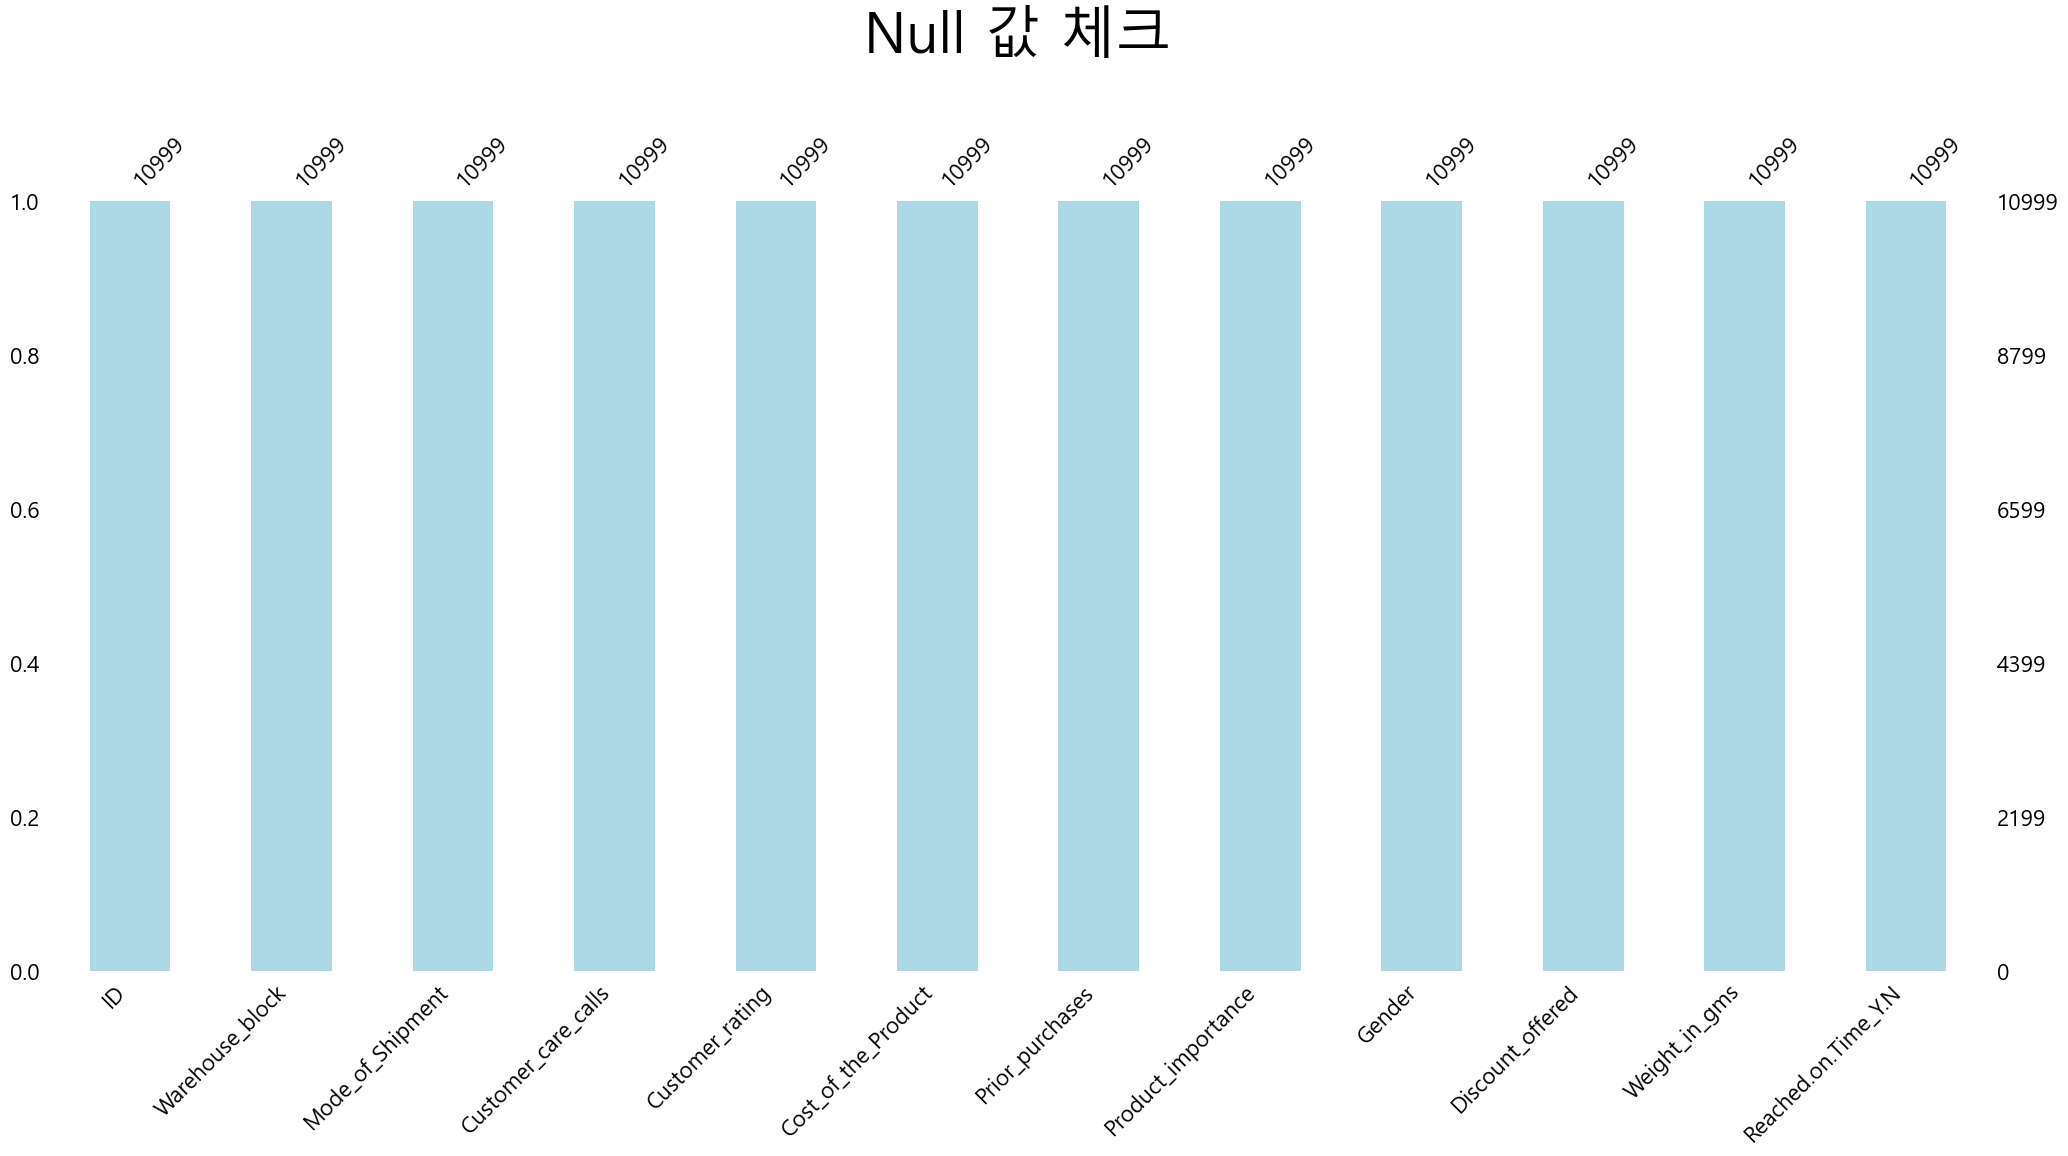

In [6]:
import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Null 값 체크\n', fontsize = 40)
plt.show()

#### 그래프 분석

* 모든 컬럼이 10999개의 값을 가지고 있음

* Null 값 미존재 확인함

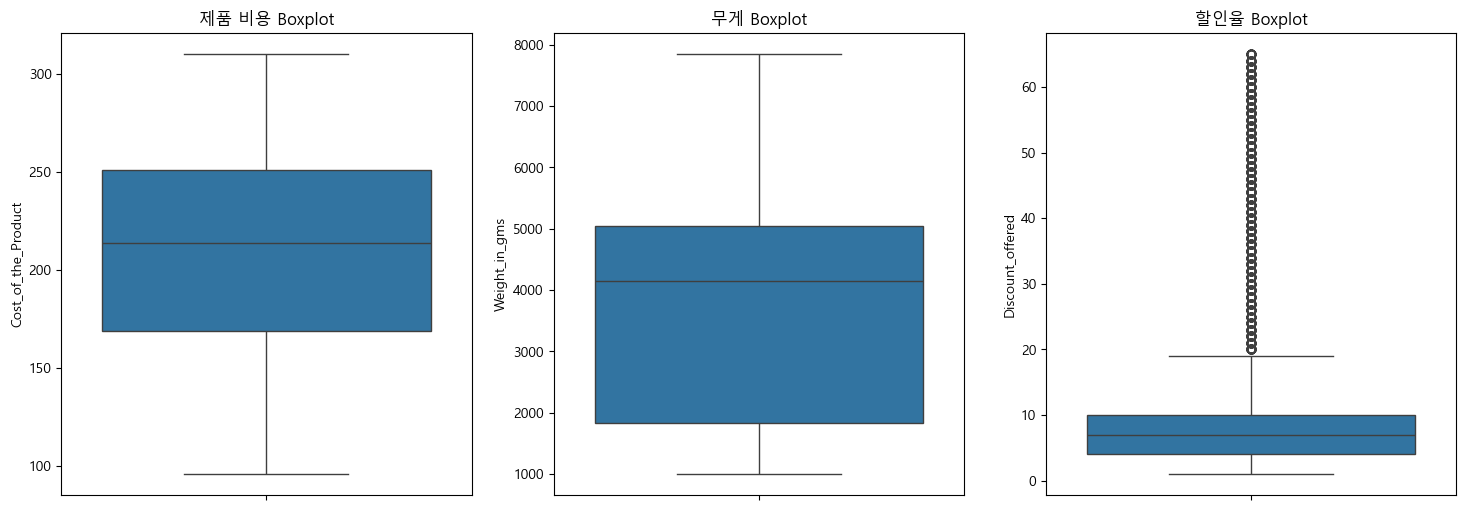

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(y='Cost_of_the_Product', data=df, ax=axes[0])
axes[0].set_title('제품 비용 Boxplot')
sns.boxplot(y='Weight_in_gms', data=df, ax=axes[1])
axes[1].set_title('무게 Boxplot')
sns.boxplot(y='Discount_offered', data=df, ax=axes[2])
axes[2].set_title('할인율 Boxplot')
plt.show()

#### 그래프 분석

* 비용, 무게에 이상치 미존재

* 할인율에 이상치 존재함으로 나오지만, 이는 데이터의 특성임으로 실질적인 이상치로 볼 수 없음 (히스토그램으로 확인)

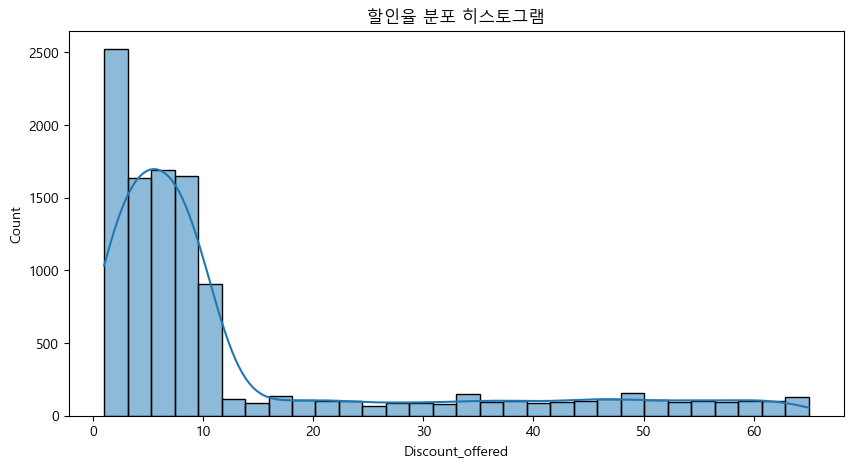

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Discount_offered'], bins=30, kde=True)
plt.title('할인율 분포 히스토그램')
plt.show()

* 할인율이 낮은 데이터가 많기 때문에 할인율이 높은 데이터가 박스플롯에서 이상치로 잡힘

## 1. 개별 변수 분석 (Univariate Analysis)

각 변수가 어떤 분포를 가지고 있는지 확인합니다.

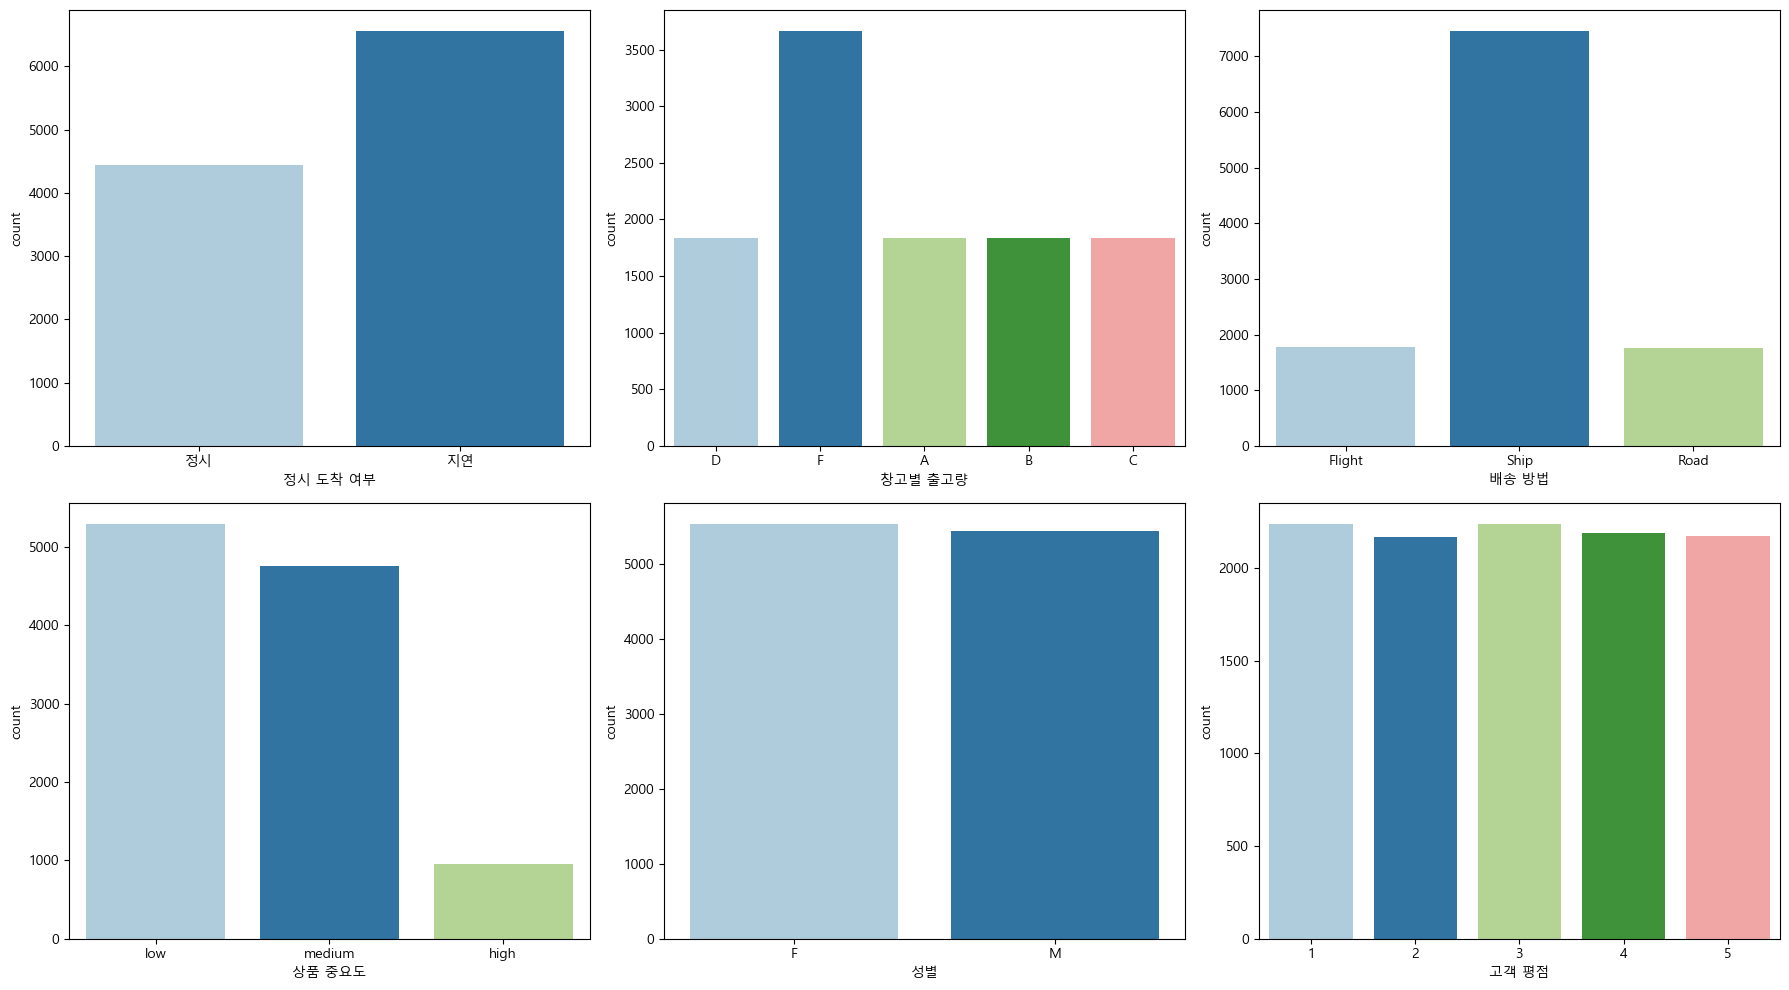

In [9]:
# 타겟 변수 및 주요 범주형 변수 분포
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x='Reached.on.Time_Y.N', data=df, ax=axes[0, 0], palette='Paired')
sns.countplot(x='Warehouse_block', data=df, ax=axes[0, 1], palette='Paired')
sns.countplot(x='Mode_of_Shipment', data=df, ax=axes[0, 2], palette='Paired')
sns.countplot(x='Product_importance', data=df, ax=axes[1, 0], palette='Paired')
sns.countplot(x='Gender', data=df, ax=axes[1, 1], palette='Paired')
sns.countplot(x='Customer_rating', data=df, ax=axes[1, 2], palette='Paired')

axes[0, 0].set_xlabel('정시 도착 여부')
axes[0, 1].set_xlabel('창고별 출고량')
axes[0, 2].set_xlabel('배송 방법')
axes[1, 0].set_xlabel('상품 중요도')
axes[1, 1].set_xlabel('성별')
axes[1, 2].set_xlabel('고객 평점')

axes[0, 0].set_xticklabels(['정시', '지연'])

plt.tight_layout()
plt.show()

#### 그래프 분석

* Reached.on.Time_Y.N : 지연 도착 수가 정시 도착에 비해 많음

* Warehouse_block : F 창고의 물량이 가장 많음

* Mode_of_Shipment : Ship이 가장 많음

* Product_importance : 제품 중요도가 low 이거나 medium인 상품의 수가 많음

* Gender : 여성의 수가 남성의 수보다 많으나, 크게 차이가 없음

* Customer_rating : 평점의 분포가 고르게 이루어져 있음

## 2. 지연 여부와의 관계 분석 (Bivariate Analysis)

단일 변수와 지연 여부 사이의 관계를 시각화합니다.

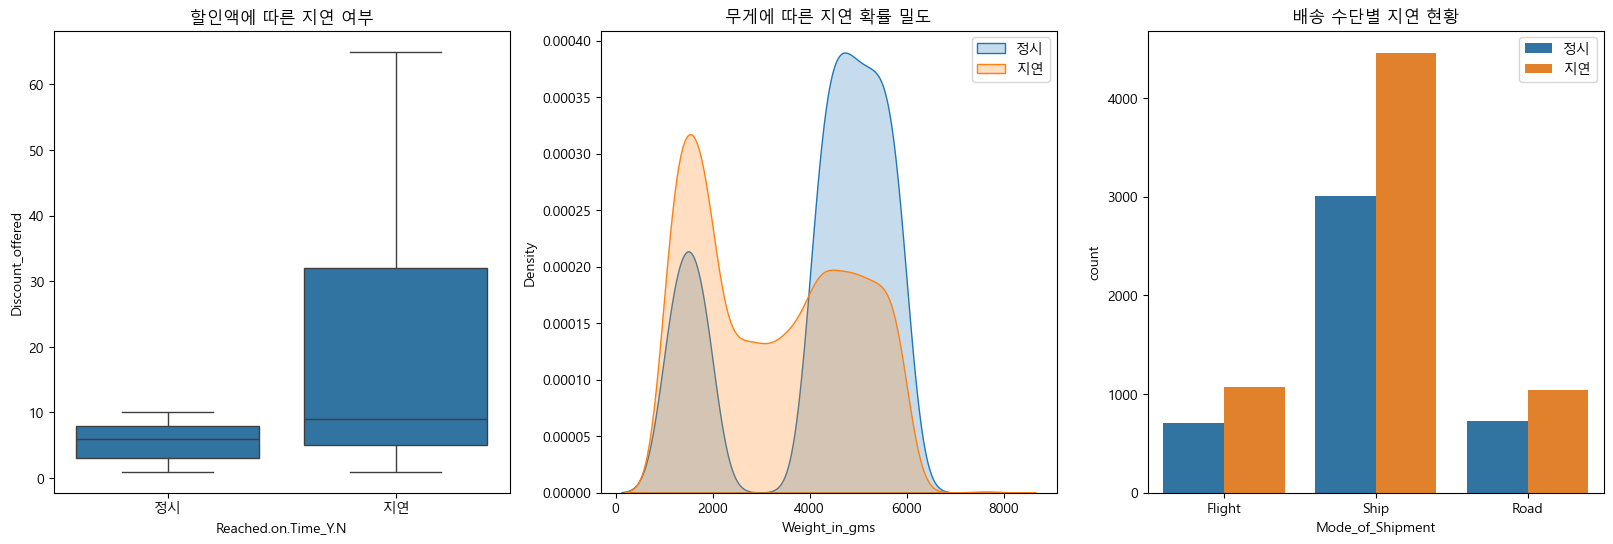

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 할인액 vs 지연
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=df, ax=axes[0])
axes[0].set_title('할인액에 따른 지연 여부')
axes[0].set_xticklabels(['정시', '지연'])

# 무게 vs 지연
sns.kdeplot(df[df['Reached.on.Time_Y.N']==0]['Weight_in_gms'], label='정시', fill=True, ax=axes[1])
sns.kdeplot(df[df['Reached.on.Time_Y.N']==1]['Weight_in_gms'], label='지연', fill=True, ax=axes[1])
axes[1].set_title('무게에 따른 지연 확률 밀도')
axes[1].legend()

# 배송 수단 vs 지연
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, ax=axes[2])
axes[2].set_title('배송 수단별 지연 현황')
axes[2].legend(['정시', '지연'])

plt.show()

#### 그래프 분석

* 할인액 + 지연 : 할인율이 10%를 넘어가면 지연 배송됨

* 무게 + 지연 : 저중량(~3000)구간과 중중량(3000~6000)구간에서 지연 배송률이 높음

* 배송 수단 + 지연 : 모든 수단에서 지연 배송률이 높으나, Ship에서 지연률이 가장 높음

## 3. 수치형 변수 간 상관관계 분석 (Correlation Analysis)

어떤 변수들이 서로 밀접하게 연관되어 있는지 히트맵으로 확인합니다.

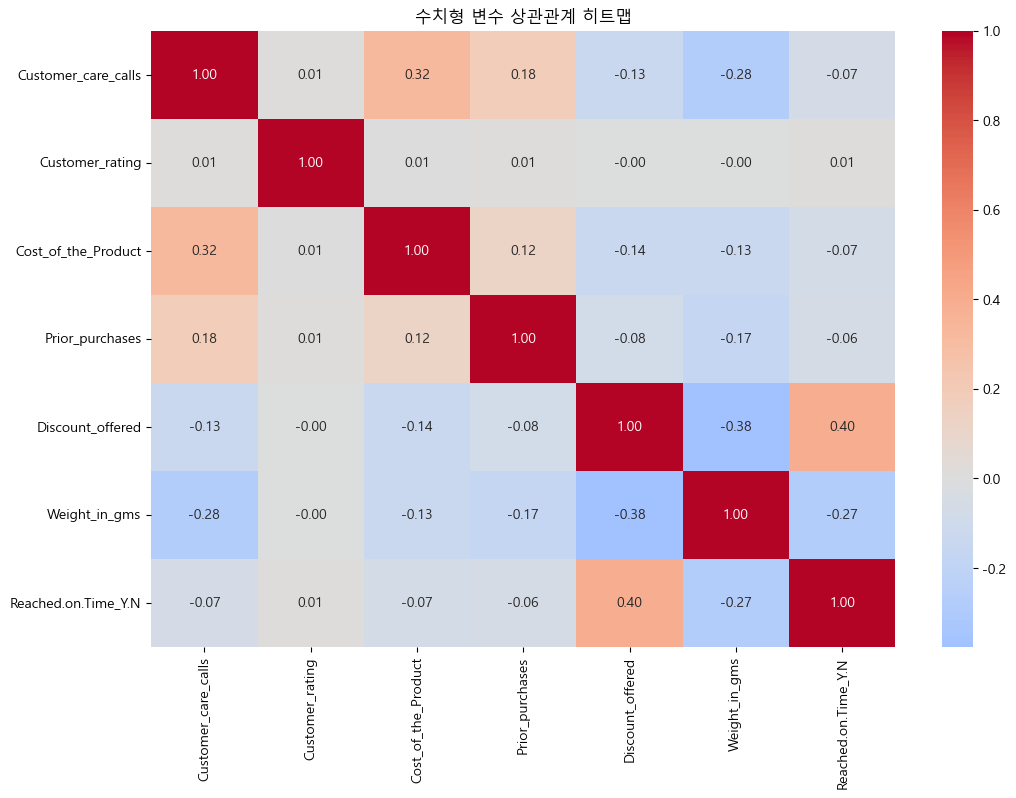

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix.drop('ID', axis=1).drop('ID', axis=0), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('수치형 변수 상관관계 히트맵')
plt.show()

#### 그래프 분석

* 고객 전화수, 고객 평점, 물품 가격, 이전 주문 회수는 지연 배송 여부에 **영향이 적음 (0.01 ~ 0.07)**

* 할인 제공은 지연 배송 여부와 **높은 양의 상관관계(+40%)**

* 상품의 무게는 지연 배송 여부와 **음의 상관관계(-27%)**

* 할인 제공과 상품의 무게 사이는 **음의 상관관계(-38%)**

* 문의 횟수와 상품의 무게 사이는 **음의 상관관계(-28%)**

* 문의 횟수와 상품 가격 사이는 **양의 상관관계(+32%)**

* 이전 구매 횟수와 문의 횟수 사이는 **약한 양의 상관관계(+18%)**

## 4. 범주형 변수별 지연율 비교 (Categorical Features Analysis)

범주형 변수가 정시 도착에 미치는 영향을 시각화

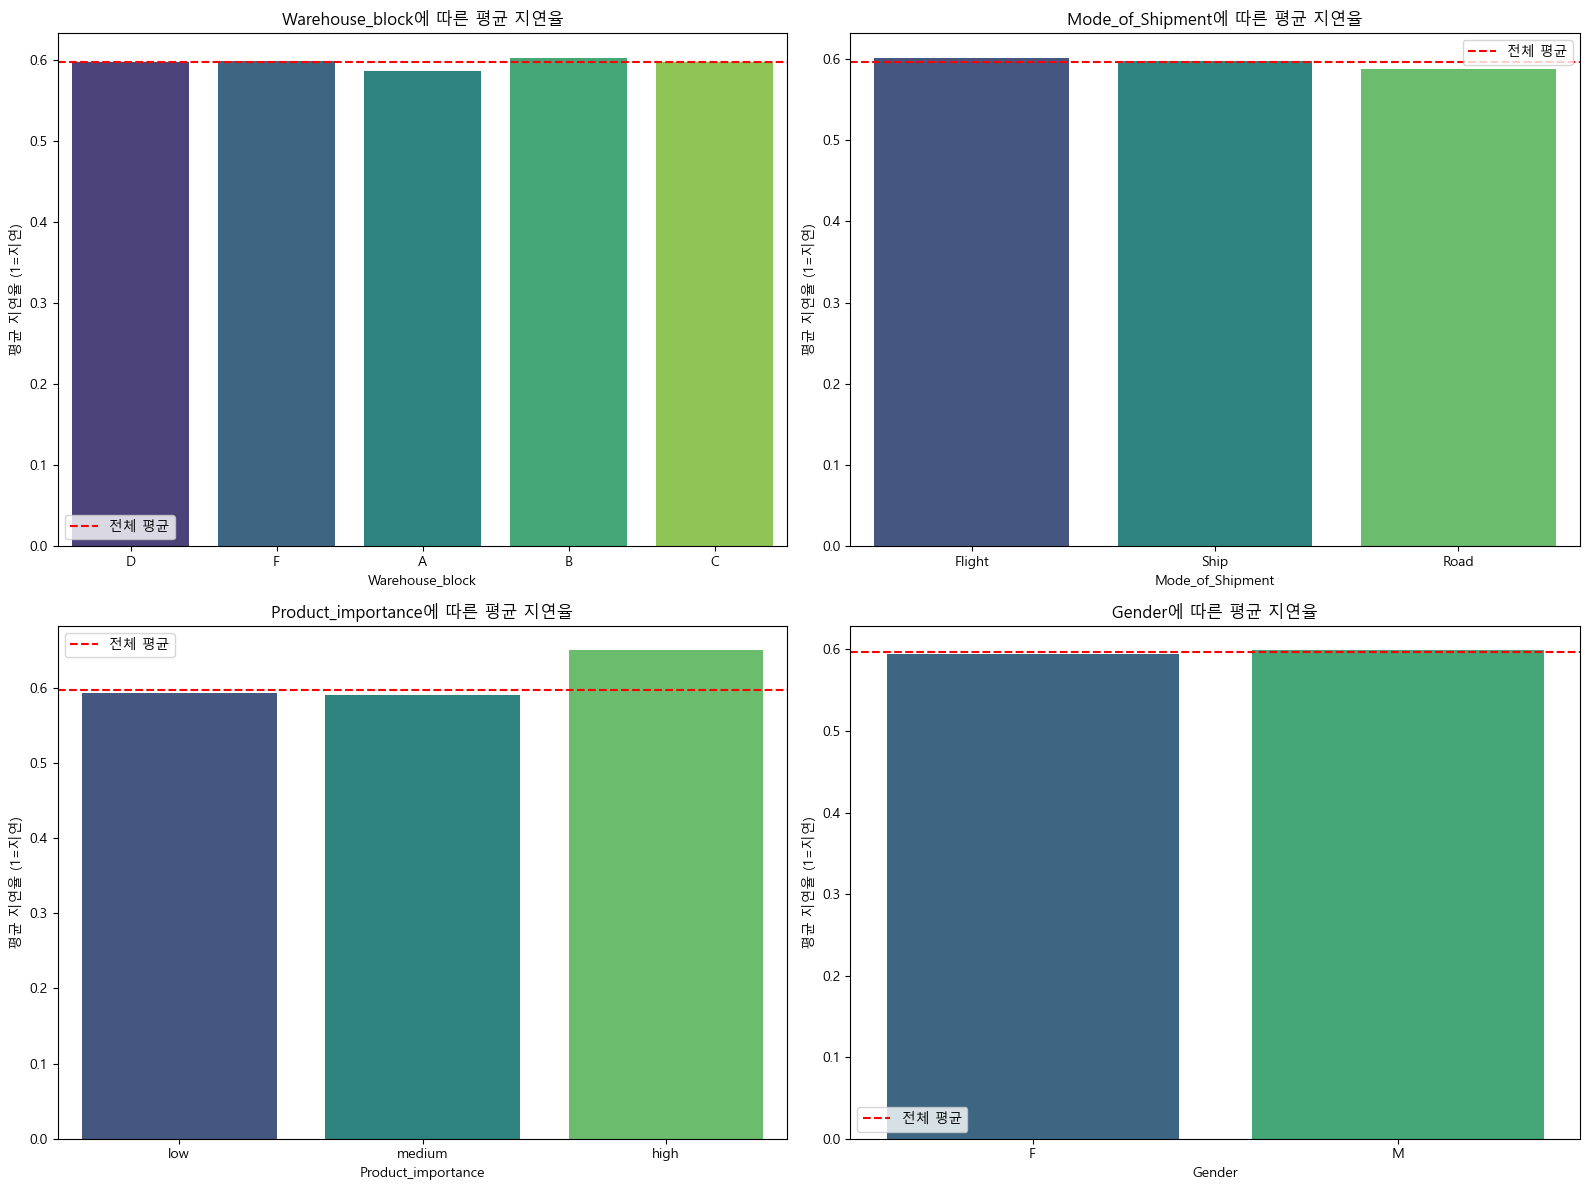

In [12]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    row, col_idx = divmod(i, 2)
    
    # 각 범주별 Reached.on.Time_Y.N의 평균(지연율) 계산
    sns.barplot(x=col, y='Reached.on.Time_Y.N', data=df, ax=axes[row, col_idx], errorbar=None, palette='viridis')
    axes[row, col_idx].set_title(f'{col}에 따른 평균 지연율')
    axes[row, col_idx].set_ylabel('평균 지연율 (1=지연)')
    
    # 전체 평균 표시
    mean_val = df['Reached.on.Time_Y.N'].mean()
    axes[row, col_idx].axhline(mean_val, color='red', linestyle='--', label='전체 평균')
    axes[row, col_idx].legend()
plt.tight_layout()
plt.show()

#### 그래프 분석

 * 대부분의 항목이 평균 지연율에 근접

 * 상품 중요도가 높음 일 때 평균 이상의 지연이 발생

   * 가치가 높은 상품 배송시 지연될 확률이 높음

## 5. 다변량 분석: 변수 간의 상호작용 (Multivariate Analysis)

배송 수단, 무게, 지연 여부의 복합적인 관계를 분석합니다.

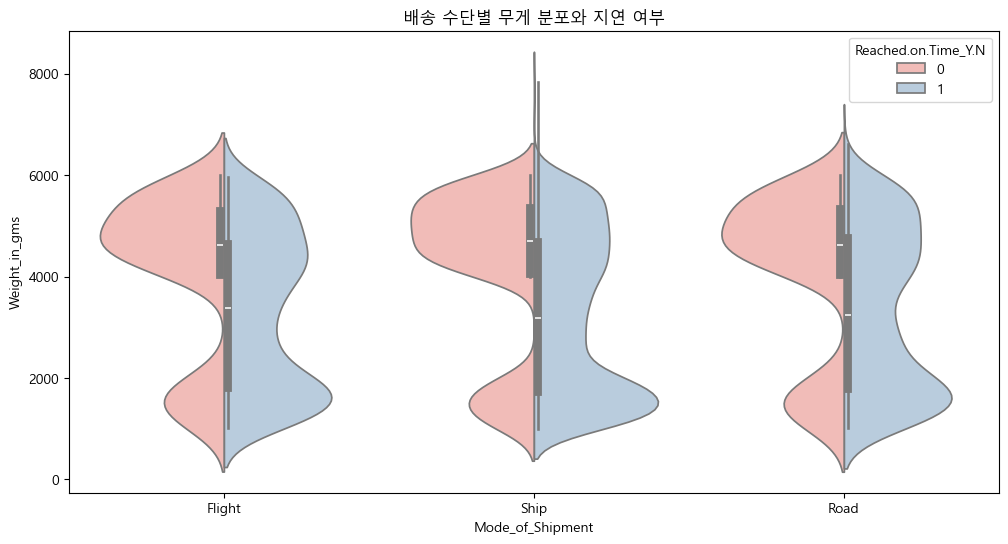

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Mode_of_Shipment', y='Weight_in_gms', hue='Reached.on.Time_Y.N', 
               data=df, split=True, palette='Pastel1')
plt.title('배송 수단별 무게 분포와 지연 여부')
plt.show()

#### 그래프 분석

* 배송 수단간의 그래프 모양이 비슷함 = 배송 수단과 지연 여부에 관계가 적음

* Ship + 낮은 무게에서의 지연 배송 그래프가 조금 더 뾰족함 = 저중량 + Ship 일 때 지연 배송률이 높다고 볼 수 있음

  * 그러나 이전 분석에서 Ship의 데이터 수가 많았기 때문에 단순 데이터 양의 차이로 인한 부분으로 해석됨

상품 비용, 무게, 지연여부의 관계를 분석

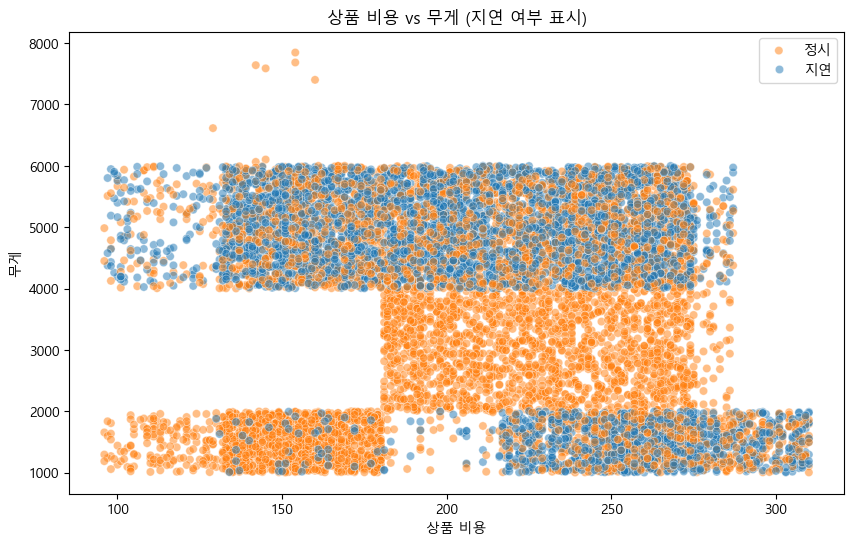

In [14]:
plt.figure(figsize=(10, 6))
costVsWei = sns.scatterplot(x='Cost_of_the_Product', y='Weight_in_gms', hue='Reached.on.Time_Y.N', data=df, alpha=0.5)
costVsWei.legend(['정시', '지연'])
costVsWei.set_xlabel('상품 비용')
costVsWei.set_ylabel('무게')
plt.title('상품 비용 vs 무게 (지연 여부 표시)')
plt.show()

#### 그래프 분석

 * 상품 무게가 특정 구간일 경우에만 지연이 발생함

 * 상품 가격은 지연 여부에 영향을 주지 않음

## 6. 고객 행동 및 만족도 분석 (Customer Behavior Analysis)

문의 전화 횟수와 평점이 지연 여부와 관련이 있는지 확인합니다.

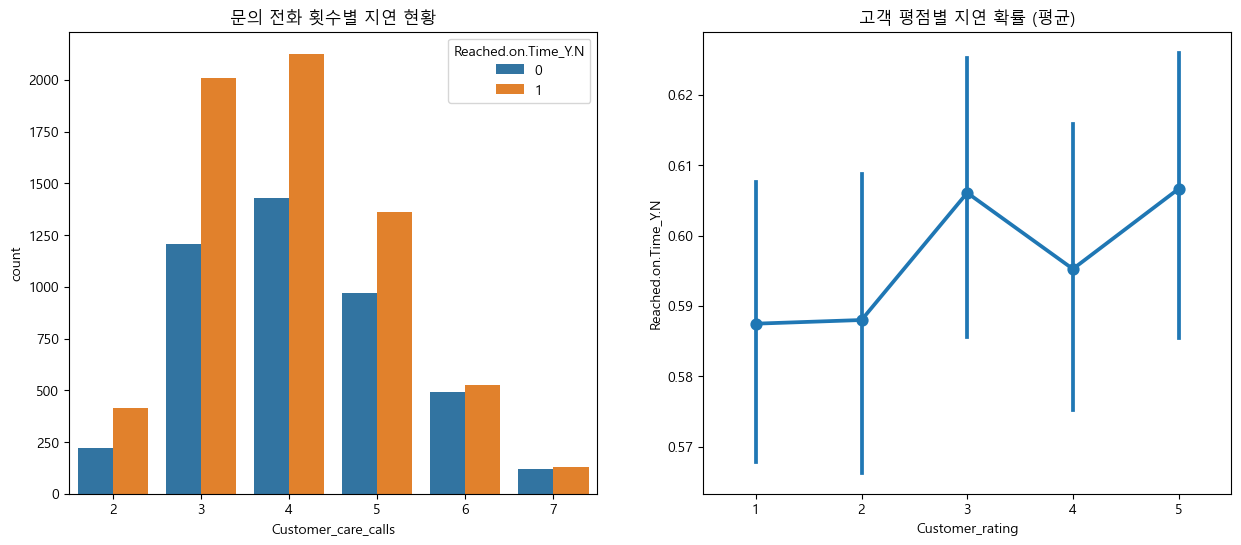

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 문의 전화 횟수별 지연율
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, ax=axes[0])
axes[0].set_title('문의 전화 횟수별 지연 현황')

# 고객 평점별 지연율
sns.pointplot(x='Customer_rating', y='Reached.on.Time_Y.N', data=df, ax=axes[1])
axes[1].set_title('고객 평점별 지연 확률 (평균)')

plt.show()

#### 그래프 분석

1. 문의 횟수별 지연
 * 문의 횟수가 3, 4회일 때 지연률이 가장 높음
 * 문의 횟수가 7회일때 지연률이 가장 낮음
 * 앞선 히트맵 그래프에서 문의 회수와 지연률의 상관관계가 낮은 것으로 나왔기 때문에 인과관계에 의한 그래프로 보여짐
 * 지연이 발생함(원인)으로 인한 문의 전화(결과)일 가능성 높음

2. 평점별 지연
 * 모든 항목에 대한 평균값의 위치가 비슷함
 * 모든 항목의 선 길이가 비슷함
 * 히트맵에서 확인한 것과 일치 (상관관계 적음)

## 7. 구간화(Binning)를 통한 패턴 강화

무게 데이터를 구간별로 나누어 지연율의 변화를 극명하게 봅니다.

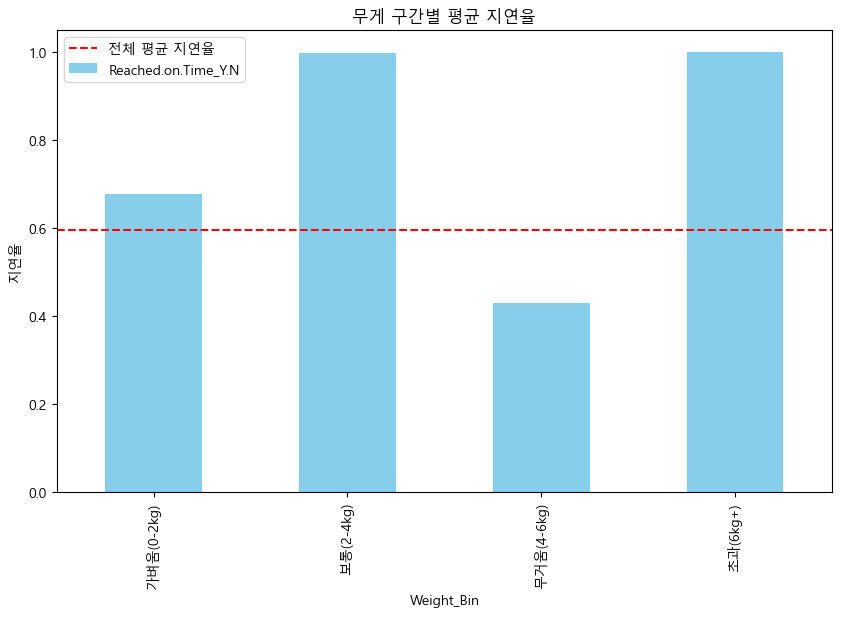

In [16]:
# 무게 구간화 (Binning)
df['Weight_Bin'] = pd.cut(df['Weight_in_gms'], bins=[0, 2000, 4000, 6000, 10000], 
                         labels=['가벼움(0-2kg)', '보통(2-4kg)', '무거움(4-6kg)', '초과(6kg+)'])

plt.figure(figsize=(10, 6))
weight_delay_rate = df.groupby('Weight_Bin')['Reached.on.Time_Y.N'].mean()
weight_delay_rate.plot(kind='bar', color='skyblue')
plt.axhline(df['Reached.on.Time_Y.N'].mean(), color='red', linestyle='--', label='전체 평균 지연율')
plt.title('무게 구간별 평균 지연율')
plt.ylabel('지연율')
plt.legend()
plt.show()

#### 그래프 분석

* 상품의 무게가 보통, 초과 일 때 지연율이 높음

* 상품의 무게가 무거움 일 때 지연율이 낮음

## 8. 심화 분석 결론

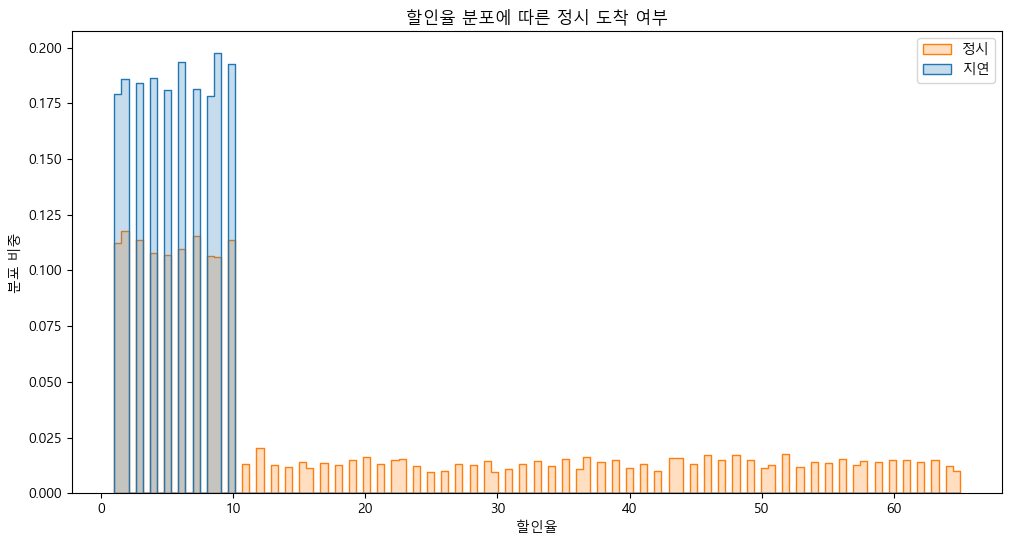

In [17]:
plt.figure(figsize=(12, 6))
dcRot = sns.histplot(data=df, x='Discount_offered', hue='Reached.on.Time_Y.N', element='step',
             stat='density', common_norm=False)
dcRot.legend(['정시', '지연'])
dcRot.set_xlabel('할인율')
dcRot.set_ylabel('분포 비중')
plt.title('할인율 분포에 따른 정시 도착 여부')
plt.show()

1. **핵심 인자** : `Discount_offered (할인율)`는 지연 여부와 가장 강력한 상관관계를 가짐. (10% 이상시 지연율이 현저히 높음)

2. **무게** : 4kg ~ 6kg 사이의 상품은 지연율이 현저히 낮음. 이 구간의 물류 프로세스가 가장 효율적.

3. **가치** : 상품 가치가 높을 때(high) 지연율이 평균 이상으로 높음.

4. **고객 피드백** : 문의 전화 횟수가 2 ~ 3회일 때 지연 확률이 높으나, 평점과의 직접적인 상관관계는 예상보다 낮음.

#### 할인이 적용되는 상품의 주문량이 많아지고, 그로인해 배송 물량이 많아지면서 지연이 발생하는 것으로 추측

#### 고가치 상품의 경우 배송 중 파손을 방지하기 위해 배송이 지연되는 것으로 추측.

<br>
<br>

---

<br>
<br>

## ***9. 가설 설정***

#### 1. 할인율(Discount_offered)이 배송 지연의 핵심 지표일 것
 * 일반적으로 할인율이 높은 상품은 재고 처리 물품이거나 프로모션 상품일 가능성
 * 배송 우선순위가 낮을 수 있거나, 반대로 특정 할인 구간에서만 배송 패턴이 다를 수 있다.
 * 할인율이 없거나 낮은 상품의 지연 발생 이유 및 원인 파악 필요


#### 2. 상품 무게(Weight_in_gms)에 따라 배송 모드와 지연 위험이 달라질 것
 * 무게는 배송 수단(항공, 선박, 육로) 결정에 영향을 미침
 * 무거운 물건일수록 물류 처리 시간이 길어질 가능성


#### 3. 고객 문의(Customer_care_calls)가 많을수록 이미 배송이 지연되고 있을 확률
 * 배송이 늦어지면 고객이 초조해하여 전화를 더 많이 할 수 있다.
 * 전화 횟수 = 지연의 결과 => 예측 변수가 될 수 있다.


#### 4. 상품 중요도(Product_importance)에 따라 배송 처리 우선순위가 다를 것
 * high 중요도를 가진 상품(가치가 높은 상품)은 더 신경 써서 배송할 가능성
 * 평균 지연율이 높은 근거가 될 수 있다.


#### 5. 상품 가격 대비 무게(Cost_of_the_Product / Weight_in_gms)가 배송 효율성을 나타낼 수 있다.
 * 가볍지만 비싼 상품(고부가가치)은 항공편 등 빠른 배송을 이용할 가능성이 높음
 * 무겁고 싼 물건은 선박을 이용할 가능성이 높음

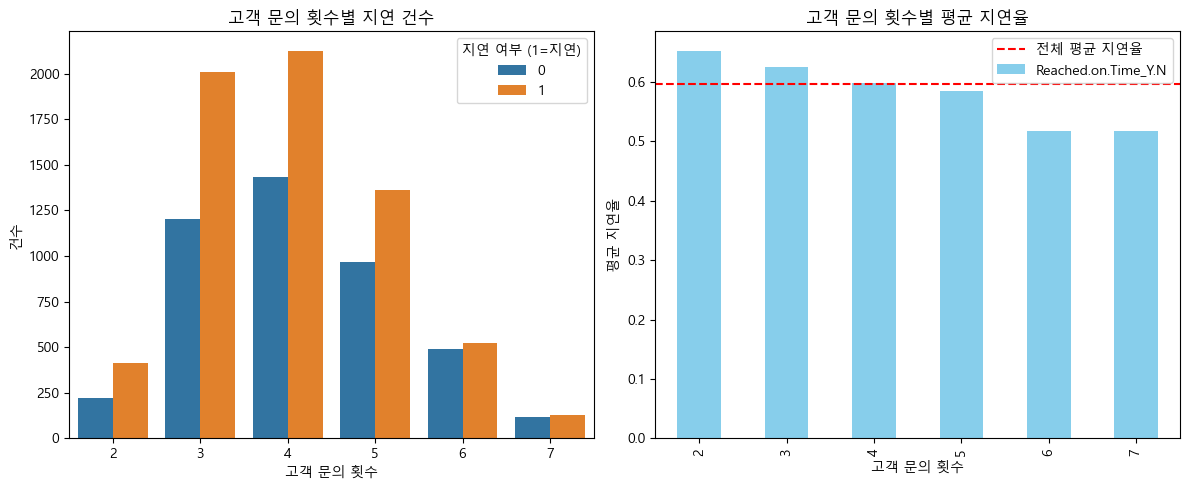

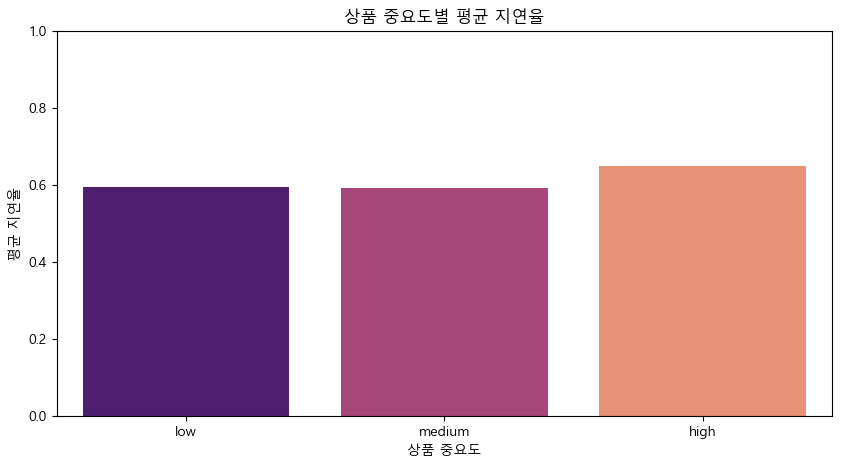

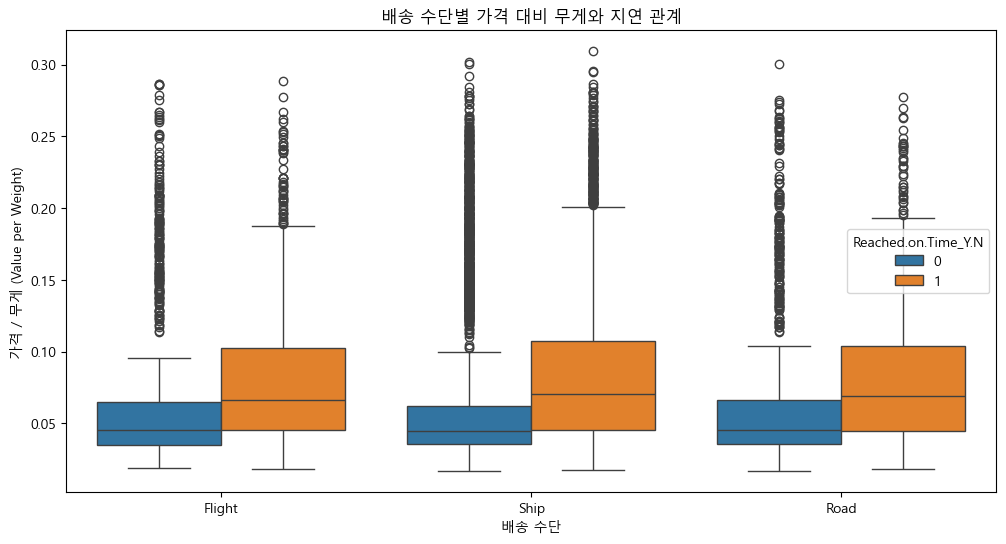

In [18]:
# 1. 가설 3: 고객 문의(Customer_care_calls)가 많을수록 지연될 확률이 높은가?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Customer_care_calls', hue='Reached.on.Time_Y.N')
plt.title('고객 문의 횟수별 지연 건수')
plt.xlabel('고객 문의 횟수')
plt.ylabel('건수')
plt.legend(title='지연 여부 (1=지연)')

plt.subplot(1, 2, 2)
calls_delay_rate = df.groupby('Customer_care_calls')['Reached.on.Time_Y.N'].mean()
calls_delay_rate.plot(kind='bar', color='skyblue')
plt.axhline(df['Reached.on.Time_Y.N'].mean(), color='red', linestyle='--', label='전체 평균 지연율')
plt.title('고객 문의 횟수별 평균 지연율')
plt.xlabel('고객 문의 횟수')
plt.ylabel('평균 지연율')
plt.legend()

plt.tight_layout()
plt.show()

# 2. 가설 4: 상품 중요도(Product_importance)에 따라 지연율의 차이가 있는가?
plt.figure(figsize=(10, 5))
importance_delay_rate = df.groupby('Product_importance')['Reached.on.Time_Y.N'].mean().reindex(['low', 'medium', 'high'])
sns.barplot(x=importance_delay_rate.index, y=importance_delay_rate.values, palette='magma')
plt.title('상품 중요도별 평균 지연율')
plt.xlabel('상품 중요도')
plt.ylabel('평균 지연율')
plt.ylim(0, 1)
plt.show()

# 3. 가설 5: 가격 대비 무게(Cost/Weight)가 배송 효율성(수단 및 지연)에 영향을 미치는가?
df['Value_Efficiency'] = df['Cost_of_the_Product'] / df['Weight_in_gms']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_of_Shipment', y='Value_Efficiency', hue='Reached.on.Time_Y.N')
plt.title('배송 수단별 가격 대비 무게와 지연 관계')
plt.xlabel('배송 수단')
plt.ylabel('가격 / 무게 (Value per Weight)')
plt.show()

1단계: 지연 예측 모델링 (Predictive Analytics)
* 단순히 배송이 늦을지 맞출지(Binary Classification)를 예측하는 것을 넘어, 어떤 조건(무게, 가격, 할인율 등)에서 지연 확률이 급격히 높아지는지를 찾아내는 알고리즘을 구축합니다.

2단계: 고객 경험 관리 (Customer Experience Insights)
* `Customer_rating`과 `Customer_care_calls`를 `Reached.on.Time`과 연계하여 분석해야 합니다.
* "배송이 지연되었을 때 평점이 얼마나 깎이는가?" 혹은 "지연이 예상될 때 선제적으로 연락하면 문의 전화를 줄일 수 있는가?"에 대한 답을 내놓아야 합니다.

3단계: 물류 및 마케팅 전략 제언 (Prescriptive Analytics)
* 할인율(Discount_offered)의 역설: 이 데이터에서 할인율이 높은 상품이 지연될 확률이 높다면, 프로모션 기간의 물류 과부하 문제를 지적할 수 있습니다.
* 배송 수단 최적화: 특정 무게 구간에서 특정 배송 수단의 지연이 잦다면, 배송 파트너사 변경이나 운송 수단 믹스 조정을 제안할 수 있습니다.

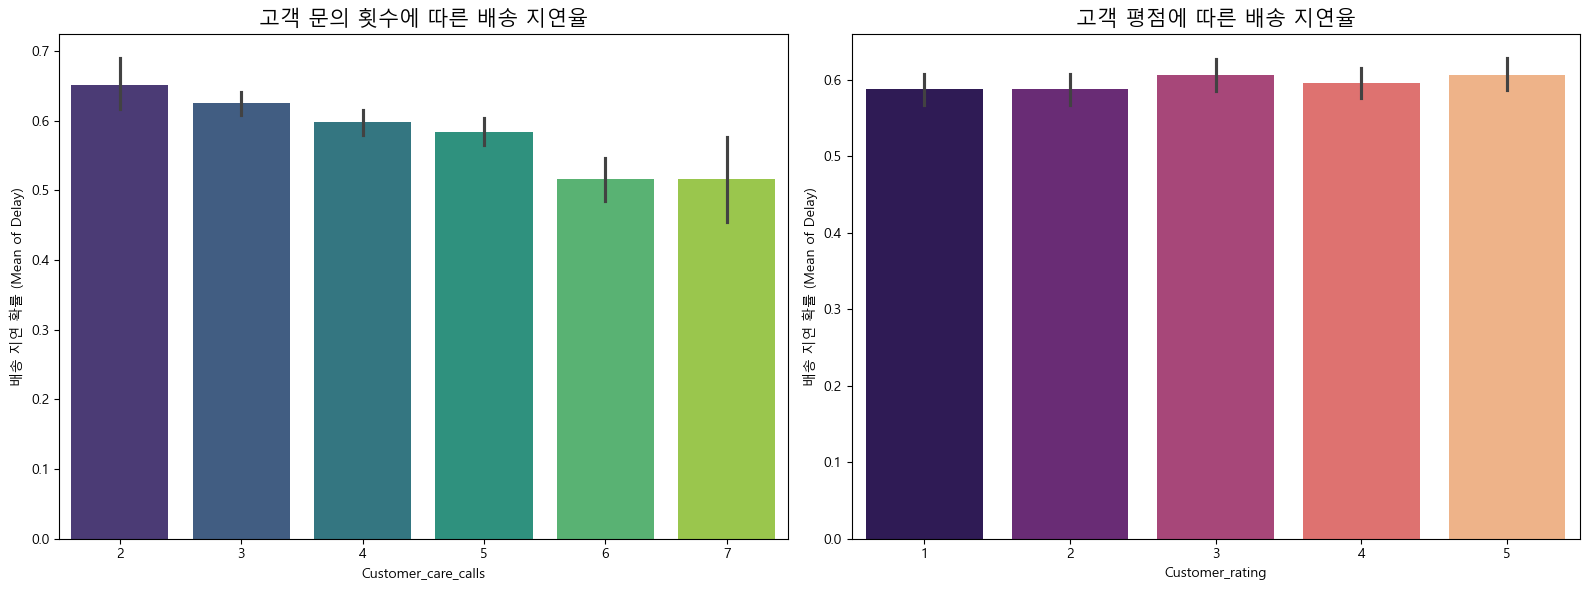

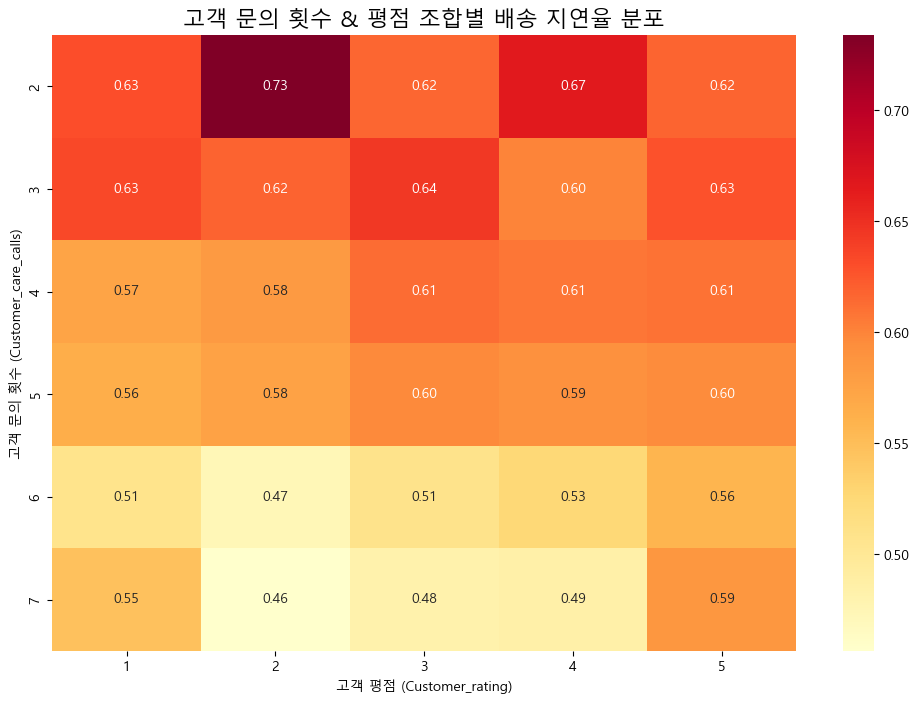

In [19]:
# 시각화를 위한 서브플롯 생성
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Customer_care_calls vs Reached.on.Time_Y.N (문의 횟수별 지연율)
# y축은 타겟의 평균(지연율)을 의미합니다.
sns.barplot(x='Customer_care_calls', y='Reached.on.Time_Y.N', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('고객 문의 횟수에 따른 배송 지연율', fontsize=15)
ax[0].set_ylabel('배송 지연 확률 (Mean of Delay)')

# 2. Customer_rating vs Reached.on.Time_Y.N (고객 평점별 지연율)
sns.barplot(x='Customer_rating', y='Reached.on.Time_Y.N', data=df, ax=ax[1], palette='magma')
ax[1].set_title('고객 평점에 따른 배송 지연율', fontsize=15)
ax[1].set_ylabel('배송 지연 확률 (Mean of Delay)')

plt.tight_layout()
plt.show()

# 3. Interaction Analysis: 문의 횟수와 평점 조합에 따른 지연율 Heatmap
# 문의 횟수와 평점의 조합이 타겟 값에 어떤 영향을 주는지 입체적으로 확인합니다.
pivot_table = df.pivot_table(index='Customer_care_calls', 
                             columns='Customer_rating', 
                             values='Reached.on.Time_Y.N', 
                             aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('고객 문의 횟수 & 평점 조합별 배송 지연율 분포', fontsize=16)
plt.xlabel('고객 평점 (Customer_rating)')
plt.ylabel('고객 문의 횟수 (Customer_care_calls)')
plt.show()

---

1. 상호작용 효과 분석 (Intersection Analysis)

    단일 변수뿐만 아니라, 두 변수가 만났을 때 지연율이 급등하는 구간을 찾아야 합니다.

    * Discount x Weight: 할인이 아주 높으면서(>10) 무게가 무거운 물건이 지연되는지, 아니면 가벼운 물건이 지연되는지? (물류 처리 우선순위 파악 가능)
    * Mode x Warehouse: 특정 창고(A~F)에서 특정 운송수단(Ship/Flight)을 이용할 때 유독 지연이 발생하는 병목 구간이 있는지?
    * Importance x Cost: 비싸고 중요한 물건인데도 지연이 발생하는 특이 케이스가 있는지?


2. 고객 행동 패턴 기반 세그먼트 분석

    고객의 특성변수(Prior_purchases, Customer_rating, Customer_care_calls)를 조합해 '고객군'을 나누고 분석해봅시다.

    * 충성 고객의 지연 경험: 기존 구매 횟수(Prior_purchases)가 많은 고객에게 배송 지연이 더 자주 발생하는지? (기업 입장에서 가장 위험한 시나리오)
    * 평점과 지연의 역설: 지연이 되었음에도 높은 평점(Customer_rating)을 준 케이스는 어떤 특징(예: 높은 할인)이 있는지?


3. 변수 변환 및 파생 변수의 유효성 시각화

    피처 엔지니어링(ECS_FE) 단계에서 만든 변수들이 실제로 타겟을 잘 구분하는지 EDA에서 먼저 증명해야 합니다.

    * Discount_High (할인 10 초과 여부): 이 변수를 기준으로 지연율 차이를 Bar Chart로 시각화하여 예측력을 확인.
    * Cost_per_Weight (무게당 가격): 무게 대비 가격이 높은 '고부가가치' 상품이 지연에 더 취약한지 확인.


4. 이상치(Outlier) 및 데이터 불균형 상세 분석

    * Discount_offered가 60을 넘는 매우 극단적인 케이스들이 지연 여부와 어떤 관계가 있는지 'Box Plot'이나 'Density Plot'으로 상세 분석.
    * 각 변수별 **WOE(Weight of Evidence)**나 **IV(Information Value)**를 계산하여, 어떤 변수가 배송 지연을 예측하는 데 가장 '순도 높은' 정보를 가지고 있는지 수치화.

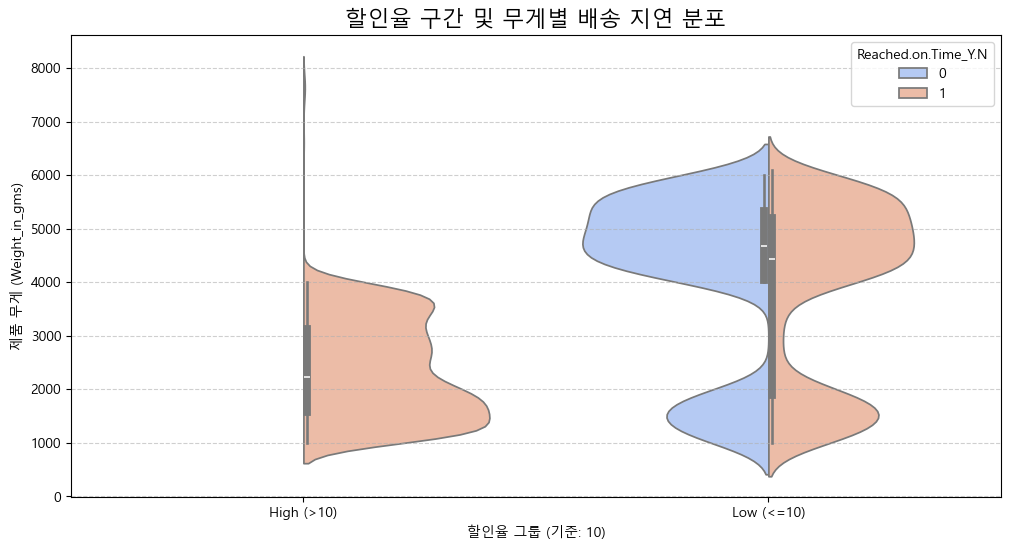

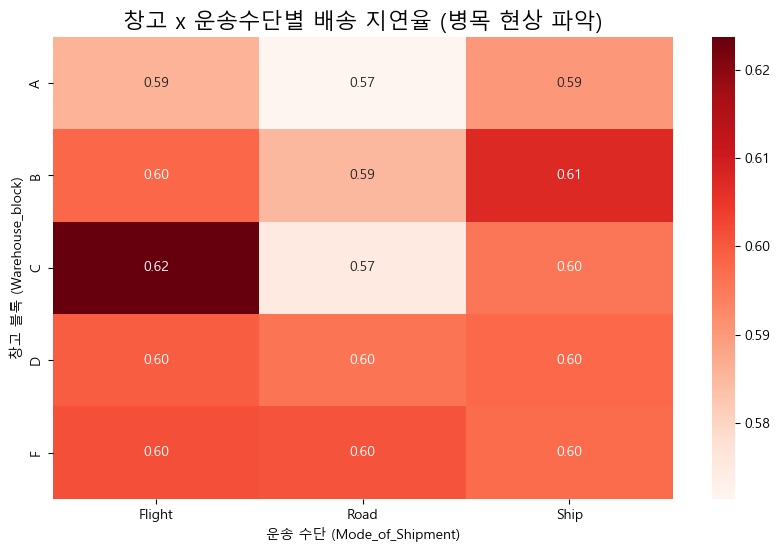

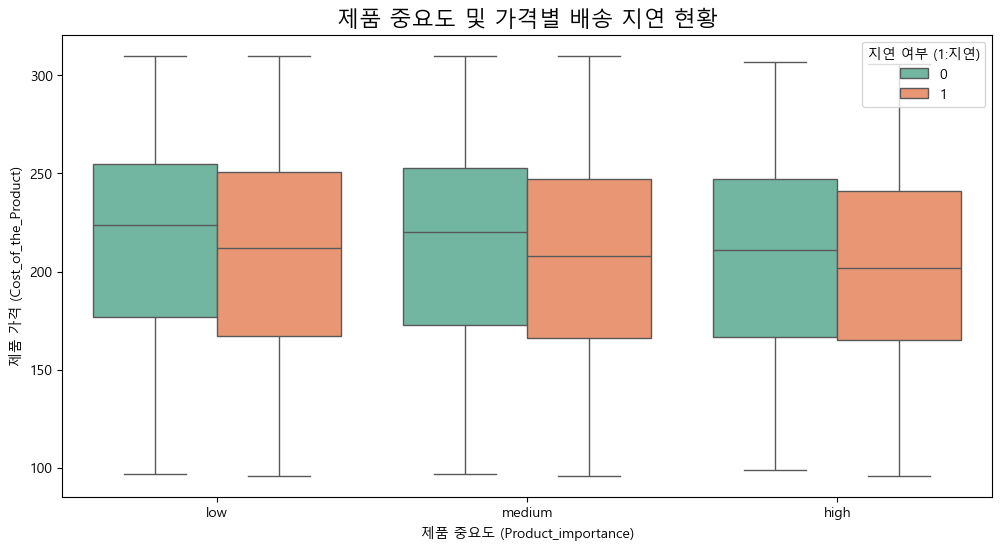

In [20]:
# ---------------------------------------------------------
# 1. Discount x Weight: 할인율 구간과 무게에 따른 지연 분석
# ---------------------------------------------------------
# 할인율 10을 기준으로 그룹 생성
df['Discount_Group'] = df['Discount_offered'].apply(lambda x: 'High (>10)' if x > 10 else 'Low (<=10)')

plt.figure(figsize=(12, 6))
sns.violinplot(x='Discount_Group', y='Weight_in_gms', hue='Reached.on.Time_Y.N', 
               data=df, split=True, palette='coolwarm')
plt.title('할인율 구간 및 무게별 배송 지연 분포', fontsize=16)
plt.xlabel('할인율 그룹 (기준: 10)')
plt.ylabel('제품 무게 (Weight_in_gms)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# 인사이트 포인트: 
# - 'High' 그룹에서 특정 무게 대에 데이터가 쏠려있는지, 
# - 'Low' 그룹 내에서 지연(1)과 정시(0)의 무게 분포 차이가 극명한지 확인하세요.


# ---------------------------------------------------------
# 2. Mode x Warehouse: 창고와 운송수단 간의 병목 구간 분석
# ---------------------------------------------------------
# 창고별, 운송수단별 배송 지연율(평균) 계산
warehouse_mode_delay = df.pivot_table(index='Warehouse_block', 
                                      columns='Mode_of_Shipment', 
                                      values='Reached.on.Time_Y.N', 
                                      aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(warehouse_mode_delay, annot=True, cmap='Reds', fmt='.2f')
plt.title('창고 x 운송수단별 배송 지연율 (병목 현상 파악)', fontsize=16)
plt.xlabel('운송 수단 (Mode_of_Shipment)')
plt.ylabel('창고 블록 (Warehouse_block)')
plt.show()

# 인사이트 포인트:
# - 특정 창고와 운송수단의 조합에서 지연율이 유독 높은 구간(진한 빨간색)이 있는지 확인하세요.
# - 예: 창고 F에서 Ship을 이용할 때의 지연율이 다른 조합보다 눈에 띄게 높은지 등


# ---------------------------------------------------------
# 3. Importance x Cost: 제품 중요도와 가격 대비 지연 특이 케이스
# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_importance', y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', 
            data=df, palette='Set2')
plt.title('제품 중요도 및 가격별 배송 지연 현황', fontsize=16)
plt.xlabel('제품 중요도 (Product_importance)')
plt.ylabel('제품 가격 (Cost_of_the_Product)')
plt.legend(title='지연 여부 (1:지연)', loc='upper right')
plt.show()

# 인사이트 포인트:
# - 'High' 중요도인데도 가격이 높으면서 지연이 발생하는 이상치(Outlier)가 많은지 확인하세요.
# - 중요도가 높은 제품에 대해 특별 관리가 이루어지고 있는지 가격대별로 분포를 비교할 수 있습니다.

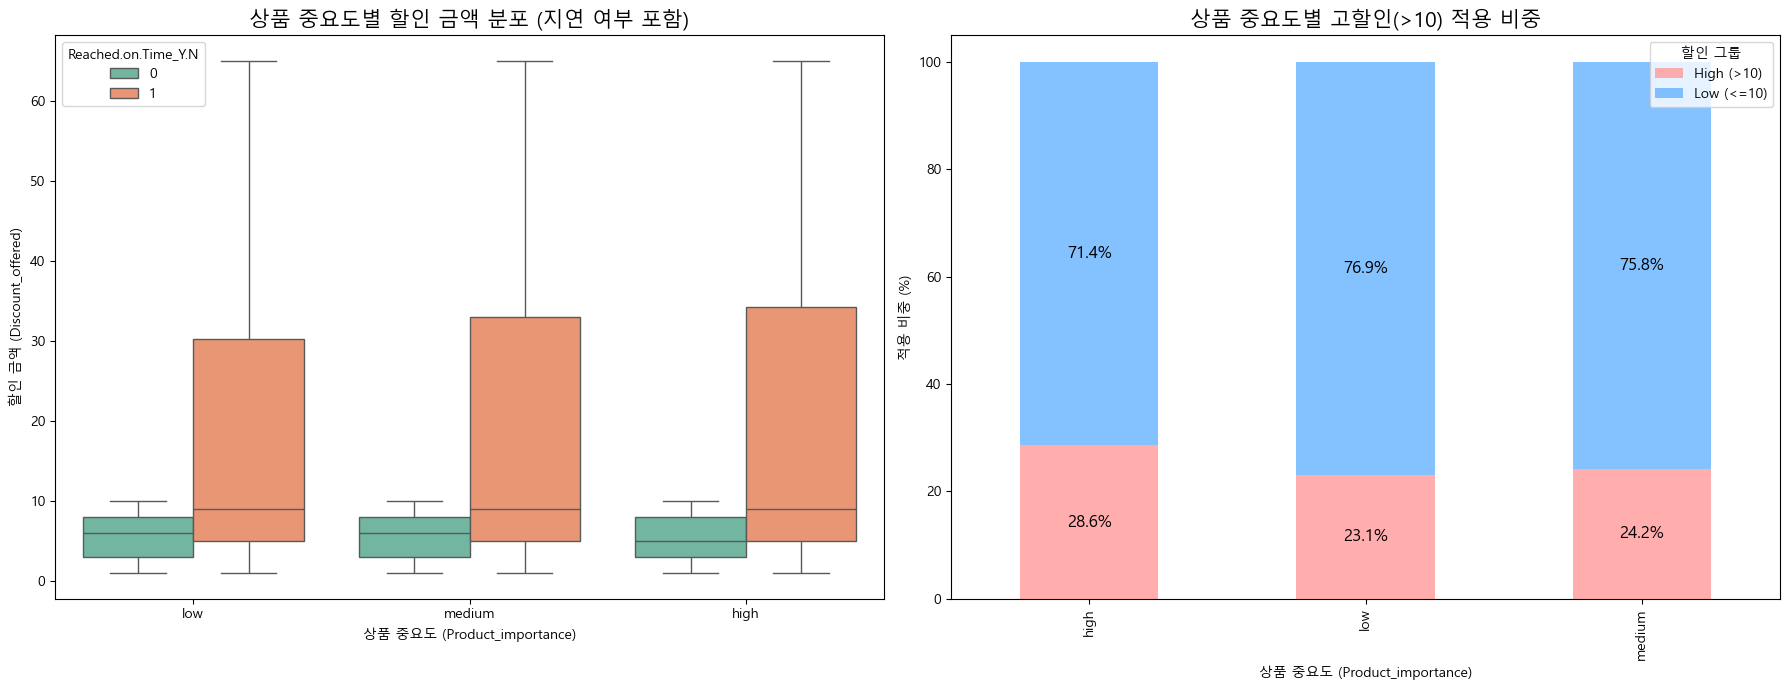

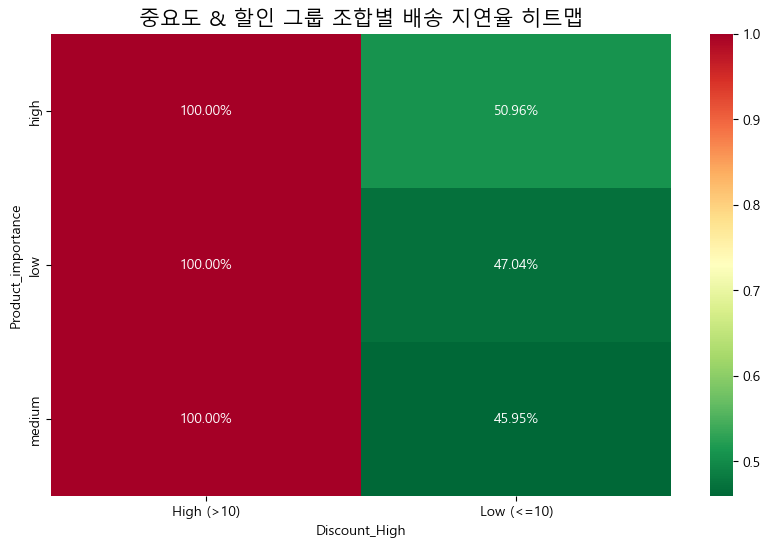

In [21]:
# 분석을 위한 고할인 여부 변수 생성 (기준: 10)
if 'Discount_High' not in df.columns:
    df['Discount_High'] = df['Discount_offered'].apply(lambda x: 'High (>10)' if x > 10 else 'Low (<=10)')

# 시각화 레이아웃 설정
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# ---------------------------------------------------------
# 1. 중요도별 할인 금액 분포 (Box Plot)
# ---------------------------------------------------------
# 상품 중요도에 따라 실제 할인 금액의 분포가 다른지 확인합니다.
sns.boxplot(x='Product_importance', y='Discount_offered', hue='Reached.on.Time_Y.N', 
            data=df, ax=ax[0], palette='Set2')
ax[0].set_title('상품 중요도별 할인 금액 분포 (지연 여부 포함)', fontsize=15)
ax[0].set_xlabel('상품 중요도 (Product_importance)')
ax[0].set_ylabel('할인 금액 (Discount_offered)')

# ---------------------------------------------------------
# 2. 중요도별 고할인(>10) 적용 비중 (Stacked Bar Chart)
# ---------------------------------------------------------
# 어떤 중요도의 상품에 고할인 정책이 더 많이 적용되는지 비율로 확인합니다.
importance_discount_pct = pd.crosstab(df['Product_importance'], df['Discount_High'], normalize='index') * 100

importance_discount_pct.plot(kind='bar', stacked=True, ax=ax[1], color=['#ff9999', '#66b3ff'], alpha=0.8)
ax[1].set_title('상품 중요도별 고할인(>10) 적용 비중', fontsize=15)
ax[1].set_xlabel('상품 중요도 (Product_importance)')
ax[1].set_ylabel('적용 비중 (%)')
ax[1].legend(title='할인 그룹', loc='upper right')

# 막대 위에 백분율 표시
for p in ax[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax[1].text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3. 추가 분석: 중요도 & 할인 그룹별 실제 지연율
# ---------------------------------------------------------
pivot_imp_disc = df.pivot_table(index='Product_importance', 
                                columns='Discount_High', 
                                values='Reached.on.Time_Y.N', 
                                aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_imp_disc, annot=True, cmap='RdYlGn_r', fmt='.2%')
plt.title('중요도 & 할인 그룹 조합별 배송 지연율 히트맵', fontsize=15)
plt.show()

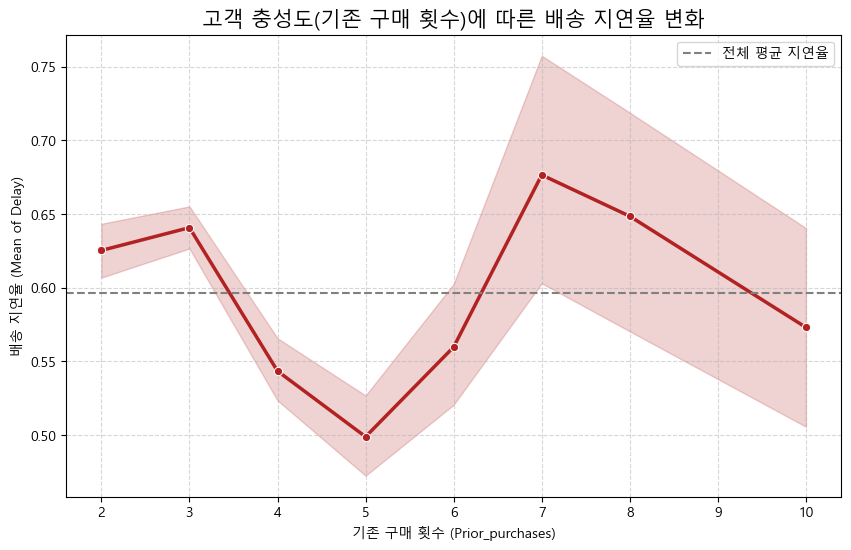

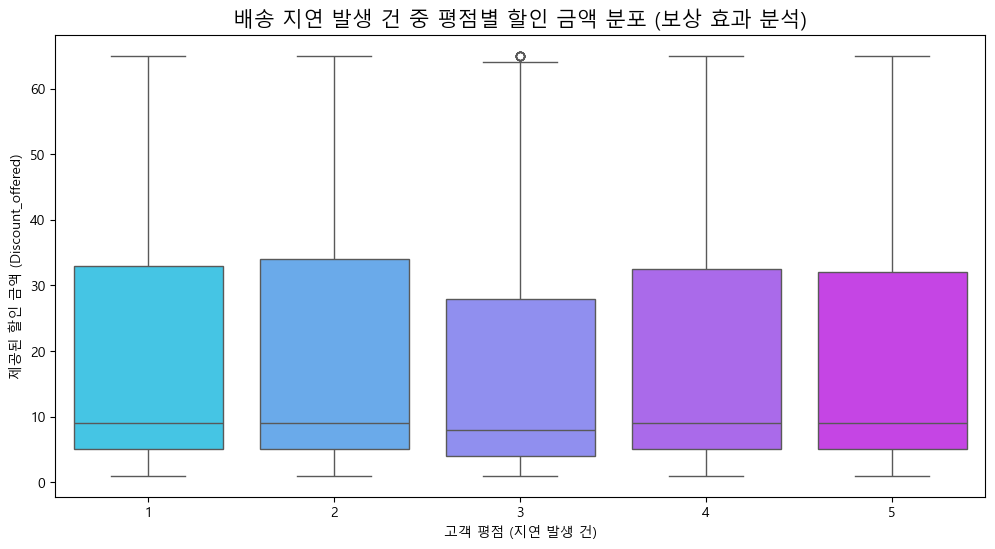

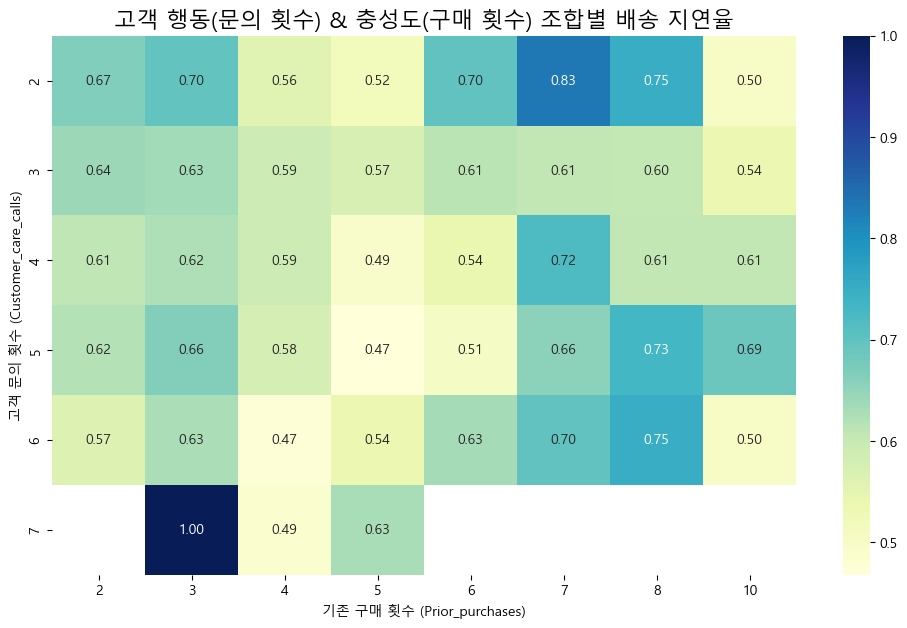

In [22]:
# ---------------------------------------------------------
# 1. 충성 고객의 지연 경험 분석 (Prior_purchases vs Delay Rate)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
# 기존 구매 횟수(충성도)별 지연율의 평균을 선 그래프로 시각화
sns.lineplot(x='Prior_purchases', y='Reached.on.Time_Y.N', data=df, marker='o', color='firebrick', linewidth=2.5)
plt.axhline(df['Reached.on.Time_Y.N'].mean(), color='gray', linestyle='--', label='전체 평균 지연율')
plt.title('고객 충성도(기존 구매 횟수)에 따른 배송 지연율 변화', fontsize=15)
plt.xlabel('기존 구매 횟수 (Prior_purchases)')
plt.ylabel('배송 지연율 (Mean of Delay)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 인사이트 포인트: 
# - 구매 횟수가 높은(예: 5회 이상) 충성 고객 구간에서 지연율이 평균보다 높게 나타나는지 확인하세요.
# - 만약 그렇다면, 충성 고객들이 배송 서비스에 실망하여 이탈할 위험이 크다는 강력한 경고 지표가 됩니다.


# ---------------------------------------------------------
# 2. 평점과 지연의 역설 분석 (지연되었음에도 높은 평점을 준 이유)
# ---------------------------------------------------------
# 대상: 실제로 배송 지연이 발생한 데이터만 추출 (Reached.on.Time_Y.N == 1)
delayed_df = df[df['Reached.on.Time_Y.N'] == 1].copy()

plt.figure(figsize=(12, 6))
# 지연된 건들에 대해, 평점별로 할인 금액(Discount_offered) 분포를 확인
sns.boxplot(x='Customer_rating', y='Discount_offered', data=delayed_df, palette='cool')
plt.title('배송 지연 발생 건 중 평점별 할인 금액 분포 (보상 효과 분석)', fontsize=15)
plt.xlabel('고객 평점 (지연 발생 건)')
plt.ylabel('제공된 할인 금액 (Discount_offered)')
plt.show()

# 인사이트 포인트:
# - 지연이 발생했음에도 평점이 4, 5점인 고객들이 낮은 평점(1, 2점) 고객들보다 
#   더 많은 할인(Discount_offered)을 받았는지 확인하세요. 
# - "할인 혜택이 배송 지연에 대한 불만을 상쇄하는 보상 기제로 작동하는가?"를 증명할 수 있습니다.


# ---------------------------------------------------------
# 3. 종합 세그먼트 분석: 문의 횟수와 충성도 조합별 지연율
# ---------------------------------------------------------
# 문의 횟수(Care_calls)와 충성도(Prior_purchases)의 조합에 따른 지연 현황을 히트맵으로 파악
pivot_segment = df.pivot_table(index='Customer_care_calls', 
                               columns='Prior_purchases', 
                               values='Reached.on.Time_Y.N', 
                               aggfunc='mean')

plt.figure(figsize=(12, 7))
sns.heatmap(pivot_segment, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('고객 행동(문의 횟수) & 충성도(구매 횟수) 조합별 배송 지연율', fontsize=16)
plt.xlabel('기존 구매 횟수 (Prior_purchases)')
plt.ylabel('고객 문의 횟수 (Customer_care_calls)')
plt.show()

# 인사이트 포인트:
# - 문의도 많고(Care_calls High) 구매도 많이 한(Prior_purchases High) 핵심 고객층에게 
#   지연이 집중되고 있는지(붉은색) 확인하여 최우선 관리 대상을 식별합니다.

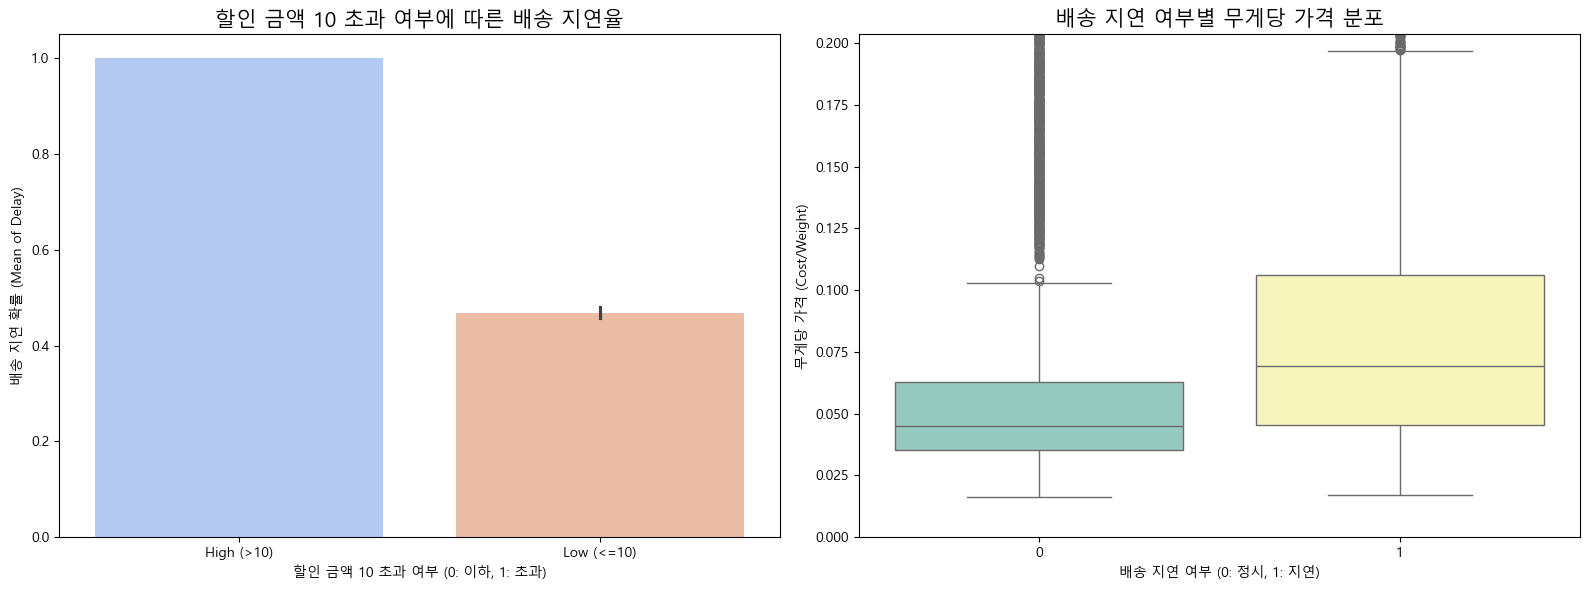

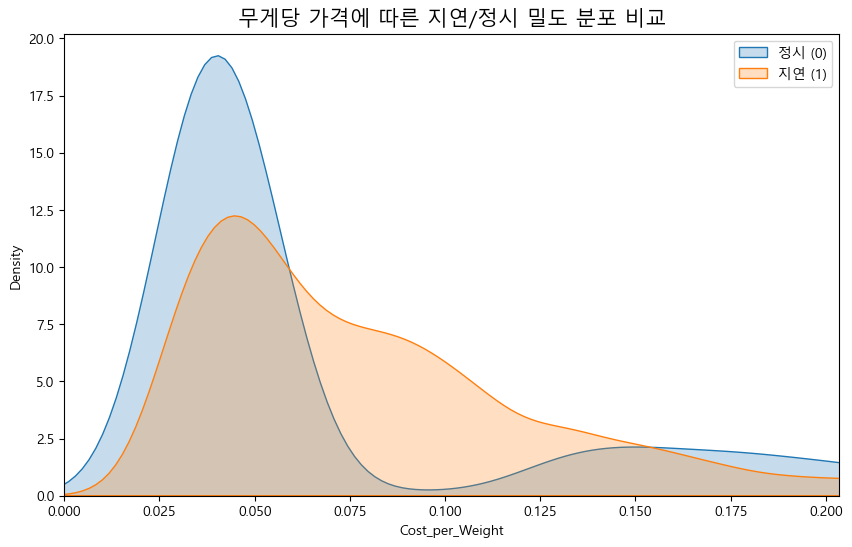

In [23]:
# 시각화를 위한 컬럼 생성 (기존 df에 없다면 생성)
if 'Discount_High' not in df.columns:
    df['Discount_High'] = (df['Discount_offered'] > 10).astype(int)

if 'Cost_per_Weight' not in df.columns:
    df['Cost_per_Weight'] = df['Cost_of_the_Product'] / df['Weight_in_gms']

# 그래프 레이아웃 설정
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# ---------------------------------------------------------
# 1. Discount_High (할인 10 초과 여부) vs 지연율
# ---------------------------------------------------------
# 바 차트를 통해 고할인 여부가 지연율을 얼마나 극명하게 가르는지 확인합니다.
sns.barplot(x='Discount_High', y='Reached.on.Time_Y.N', data=df, ax=ax[0], palette='coolwarm')
ax[0].set_title('할인 금액 10 초과 여부에 따른 배송 지연율', fontsize=15)
ax[0].set_xlabel('할인 금액 10 초과 여부 (0: 이하, 1: 초과)')
ax[0].set_ylabel('배송 지연 확률 (Mean of Delay)')

# ---------------------------------------------------------
# 2. Cost_per_Weight (무게당 가격) vs 지연 여부
# ---------------------------------------------------------
# 고부가가치 상품(가볍지만 비싼 상품)이 지연에 취약한지 확인하기 위해 분포를 비교합니다.
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_per_Weight', data=df, ax=ax[1], palette='Set3')
# 이상치 영향을 줄여 박스 가독성을 높이기 위해 상위 95% 구간으로 제한하여 시각화
ax[1].set_ylim(0, df['Cost_per_Weight'].quantile(0.95)) 
ax[1].set_title('배송 지연 여부별 무게당 가격 분포', fontsize=15)
ax[1].set_xlabel('배송 지연 여부 (0: 정시, 1: 지연)')
ax[1].set_ylabel('무게당 가격 (Cost/Weight)')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3. 추가 분석: Cost_per_Weight의 밀도 분포(KDE) 확인
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Reached.on.Time_Y.N']==0], x='Cost_per_Weight', label='정시 (0)', fill=True)
sns.kdeplot(data=df[df['Reached.on.Time_Y.N']==1], x='Cost_per_Weight', label='지연 (1)', fill=True)
plt.xlim(0, df['Cost_per_Weight'].quantile(0.95))
plt.title('무게당 가격에 따른 지연/정시 밀도 분포 비교', fontsize=15)
plt.legend()
plt.show()

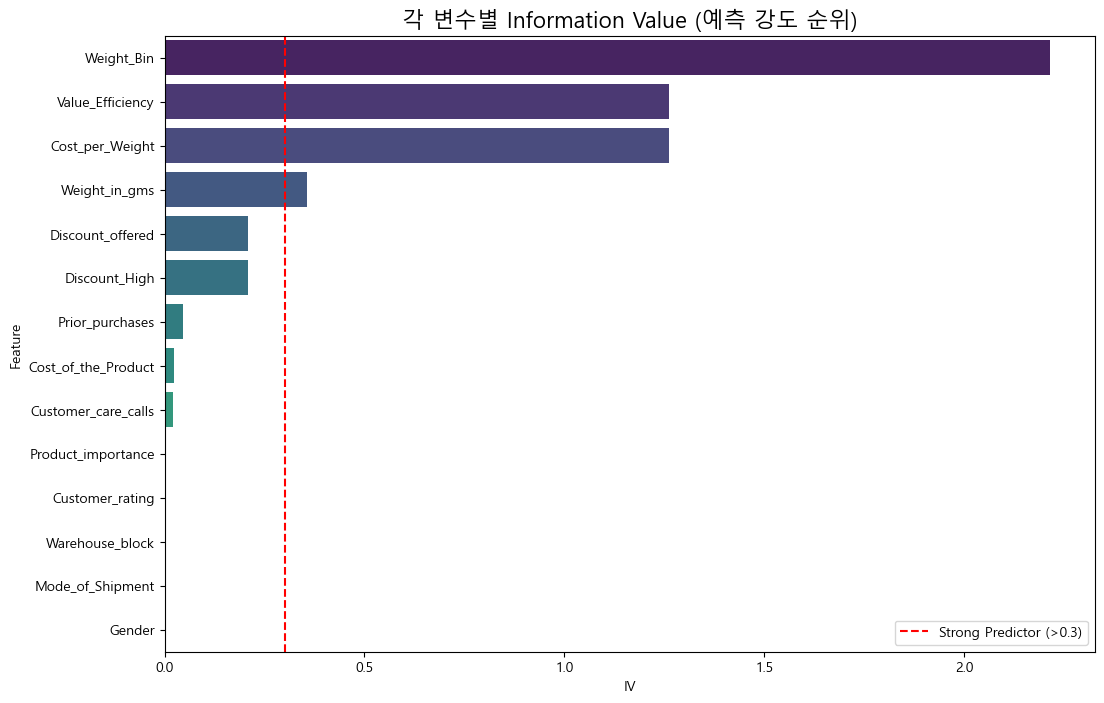

최고 예측력을 가진 상위 변수:
             Feature        IV
10        Weight_Bin  2.214687
11  Value_Efficiency  1.262338
13   Cost_per_Weight  1.262338
9      Weight_in_gms  0.355708
8   Discount_offered  0.209957


In [24]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    # 연속형 변수는 10개의 구간(quantile)으로 나누어 처리
    if dataset[feature].nunique() > 10:
        dataset['temp_bin'] = pd.qcut(dataset[feature], q=10, duplicates='drop')
        feature = 'temp_bin'
    
    for val in dataset[feature].unique():
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    d3 = pd.DataFrame(lst)
    d3['Dist_Good'] = d3['Good'] / d3['Good'].sum()
    d3['Dist_Bad'] = d3['Bad'] / d3['Bad'].sum()
    d3['WoE'] = np.log(d3['Dist_Good'] / d3['Dist_Bad'])
    d3['IV'] = (d3['Dist_Good'] - d3['Dist_Bad']) * d3['WoE']
    
    # 무한대 값 처리
    d3 = d3.replace([np.inf, -np.inf], 0)
    iv = d3['IV'].sum()
    
    if 'temp_bin' in dataset.columns:
        dataset.drop('temp_bin', axis=1, inplace=True)
        
    return iv

# 타겟과 분석 제외 컬럼 설정
target = 'Reached.on.Time_Y.N'
exclude_cols = [target, 'ID', 'Discount_Group'] # 분석 환경에 맞춰 수정
features = [col for col in df.columns if col not in exclude_cols]

# 모든 변수의 IV 계산
iv_list = []
for col in features:
    iv_val = calculate_woe_iv(df, col, target)
    iv_list.append({'Feature': col, 'IV': iv_val})

iv_df = pd.DataFrame(iv_list).sort_values(by='IV', ascending=False)

# IV 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='IV', y='Feature', data=iv_df, palette='viridis')
plt.axvline(x=0.3, color='red', linestyle='--', label='Strong Predictor (>0.3)')
plt.title('각 변수별 Information Value (예측 강도 순위)', fontsize=16)
plt.legend()
plt.show()

print("최고 예측력을 가진 상위 변수:")
print(iv_df.head(5))

In [25]:
# [Cell 1] 파생 변수 확정 및 불필요한 변수 제거
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 복사 (원본 보존)
if 'df' in locals():
    df_final = df.copy()
else:
    # 혹시 변수가 없다면 로드 (파일명 확인 필요)
    df_final = pd.read_csv('Train.csv')

# 2. 'Weight_Bin' (무게 구간) 변수 확실하게 생성
# (EDA 단계에서 만들어졌을 수 있지만, 모델링용으로 재확인)
# 0-2kg: 가벼움 / 2-4kg: 보통 / 4-6kg: 무거움 / 6kg+: 매우 무거움
df_final['Weight_Bin'] = pd.cut(df_final['Weight_in_gms'], 
                                bins=[0, 2000, 4000, 6000, 20000], 
                                labels=['Light', 'Medium', 'Heavy', 'Very_Heavy'])

# 3. 중요 정보 반영: 'Feature Selection'
# - ID: 예측에 무의미하므로 삭제
# - Weight_in_gms: 'Weight_Bin'을 쓰기로 했으므로 중복 방지를 위해 삭제
# - Gender: 앞선 EDA/IV 분석에서 중요도가 매우 낮았으므로 삭제 (선택 사항)
drop_cols = ['ID', 'Weight_in_gms', 'Gender']
df_final = df_final.drop(columns=drop_cols, errors='ignore')

# 4. 모든 범주형(문자/구간) 변수 -> 숫자 변환 (인코딩)
# (Light, Medium 같은 구간 정보도 0, 1, 2... 숫자로 바뀝니다)
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for col in categorical_cols:
    df_final[col] = le.fit_transform(df_final[col].astype(str))

print("✅ 데이터 준비 완료!")
print(f"사용된 변수 목록: {list(df_final.columns)}")

✅ 데이터 준비 완료!
사용된 변수 목록: ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Discount_offered', 'Reached.on.Time_Y.N', 'Weight_Bin', 'Value_Efficiency', 'Discount_Group', 'Discount_High', 'Cost_per_Weight']


In [26]:
# [Cell 2] 데이터 분할 및 모델 학습
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. X(입력), y(정답) 분리
target = 'Reached.on.Time_Y.N'
X = df_final.drop(columns=[target])
y = df_final[target]

# 2. 학습/테스트 데이터 분할
# stratify=y : 정답 비율(0과 1)을 유지하며 잘라줌 (불균형 데이터에 필수)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. 랜덤 포레스트 모델 학습
# class_weight='balanced': 지연/정시 데이터 불균형을 모델이 자동 보정
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 예측 확률도 함께 계산 (ROC-AUC 평가용)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("✅ 모델 학습 완료!")

✅ 모델 학습 완료!


=== 📊 모델 성능 종합 리포트 ===
1. 정확도 (Accuracy)  : 66.68%
2. F1 점수 (F1-Score) : 69.03%
3. ROC-AUC 점수       : 0.7414
------------------------------
[상세 분류 리포트]
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       887
           1       0.78      0.62      0.69      1313

    accuracy                           0.67      2200
   macro avg       0.67      0.68      0.66      2200
weighted avg       0.69      0.67      0.67      2200



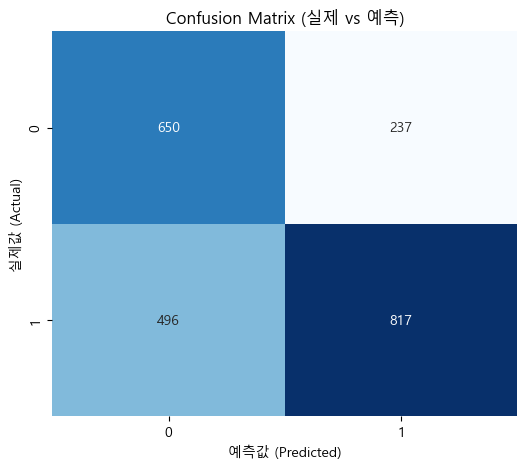

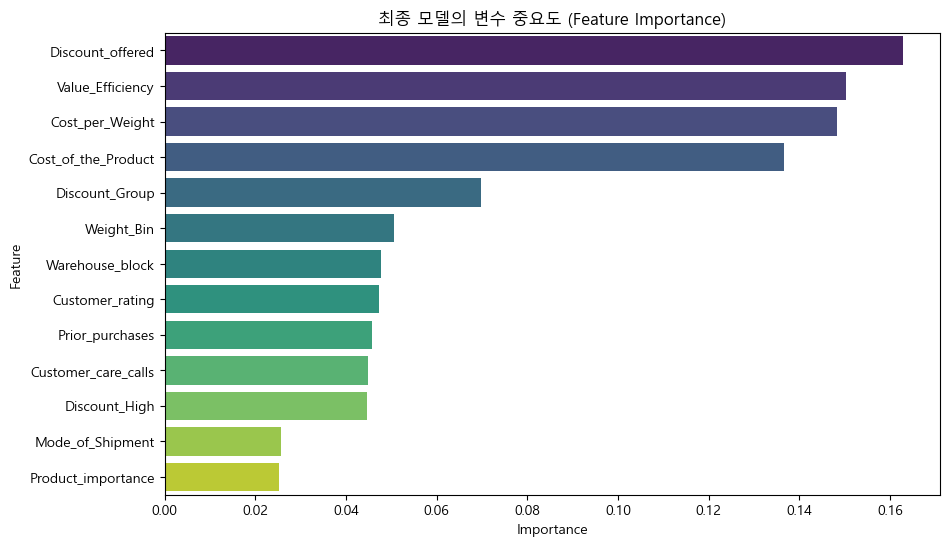

In [27]:
# [Cell 3] 심층 성능 평가 및 중요 변수 확인
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 다양한 평가지표 출력
print("=== 📊 모델 성능 종합 리포트 ===")
print(f"1. 정확도 (Accuracy)  : {accuracy_score(y_test, y_pred):.2%}")
print(f"2. F1 점수 (F1-Score) : {f1_score(y_test, y_pred):.2%}")
print(f"3. ROC-AUC 점수       : {roc_auc_score(y_test, y_pred_proba):.4f}")
print("-" * 30)
print("[상세 분류 리포트]")
print(classification_report(y_test, y_pred))

# 2. 혼동 행렬 시각화
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (실제 vs 예측)')
plt.ylabel('실제값 (Actual)')
plt.xlabel('예측값 (Predicted)')
plt.show()

# 3. 최종 변수 중요도 확인
# (Weight_Bin이 얼마나 중요한지 확인 가능)
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title('최종 모델의 변수 중요도 (Feature Importance)')
plt.show()

In [28]:
# [Cell 4: 모델 성능 극대화 - 하이퍼파라미터 튜닝]
# 이 코드는 실행 시간이 조금 걸릴 수 있습니다 (약 1~3분)

from sklearn.model_selection import GridSearchCV

# 1. 튜닝할 파라미터 설정 (나무 개수, 깊이 등 실험할 목록)
param_grid = {
    'n_estimators': [100, 200],       # 나무의 개수
    'max_depth': [10, 20, None],      # 나무의 깊이 (너무 깊으면 과적합)
    'min_samples_split': [2, 5],      # 노드를 분할하기 위한 최소 데이터 수
    'class_weight': ['balanced', None] # 데이터 불균형 처리 여부
}

# 2. 그리드 서치 (GridSearchCV) 설정
# cv=5 : 데이터를 5조각으로 나눠 교차 검증 (신뢰도 상승)
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy', # 또는 'recall'로 변경 가능
    n_jobs=-1           # CPU 병렬 처리로 속도 향상
)

print("⏳ 최적의 모델을 찾는 중입니다... (잠시만 기다려주세요)")
rf_grid.fit(X_train, y_train)

# 3. 최적의 결과 확인
print("\n=== 🏆 튜닝 결과 ===")
print(f"가장 좋은 파라미터: {rf_grid.best_params_}")
print(f"가장 좋은 교차검증 점수: {rf_grid.best_score_:.4f}")

# 4. 최적의 모델로 최종 테스트
best_model = rf_grid.best_estimator_
final_pred = best_model.predict(X_test)
final_acc = accuracy_score(y_test, final_pred)

print(f"\n🎯 튜닝 후 최종 테스트 정확도: {final_acc:.2%}")

⏳ 최적의 모델을 찾는 중입니다... (잠시만 기다려주세요)

=== 🏆 튜닝 결과 ===
가장 좋은 파라미터: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
가장 좋은 교차검증 점수: 0.6867

🎯 튜닝 후 최종 테스트 정확도: 68.09%
